In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import matplotlib.colors as mcolors
import networkx as nx
import pickle

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_wc

import matplotlib as mpl
label_size= 24
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = label_size

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

pickledir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/2n")
dir = os.path.join(pickledir, "images_2n_wc_statespace")

print(dir)

/home/lena/Promotion/neurolib_aln_osc_datastorage/optimal_control/WP2/2n/images_2n_wc_statespace


In [3]:
delay_array = [0., 4.75, 9.5, 14.25, 19.]
coupling_array = [0.0, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2]

cmats = []
cmats.append(np.array( [[0., 0.], [1., 0.]] ))
cmats.append(np.array( [[0., 1.], [1., 0.]] ))

N = 2

In [4]:
statespace = [ [ [dict() for x0 in range(len(delay_array))] for x1 in range(len(coupling_array)) ] for x2 in range(len(cmats)) ]

dx = 0.1
emin, emax, imin, imax = 0.5, 3.5, 0., 2.5
eext = np.arange(emin, emax + dx, dx)
iext = np.arange(imin, imax + dx, dx)

LIMOSCBI = 0.2
LIMOSCPHASE = 1.

1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 1 0


1 1 1
1 1 2
1 1 3
1 1 4
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
up state with osc decay


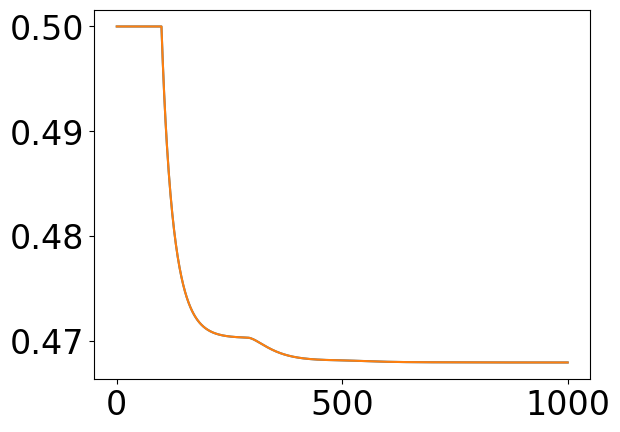

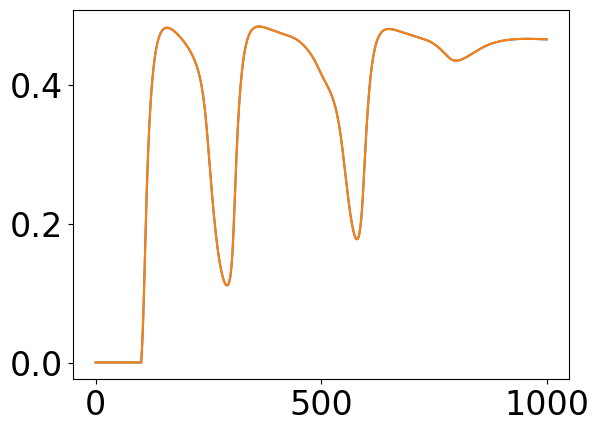

up state with osc decay


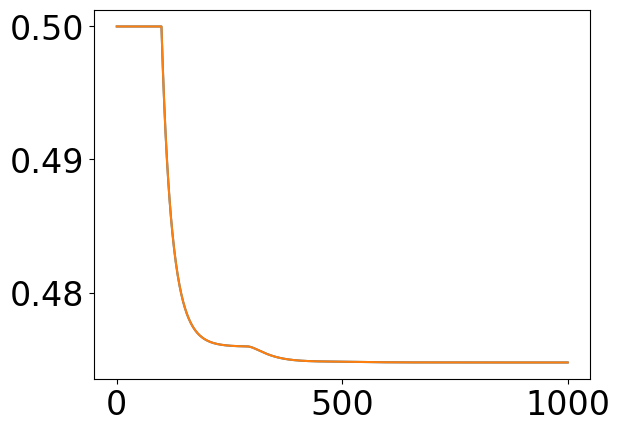

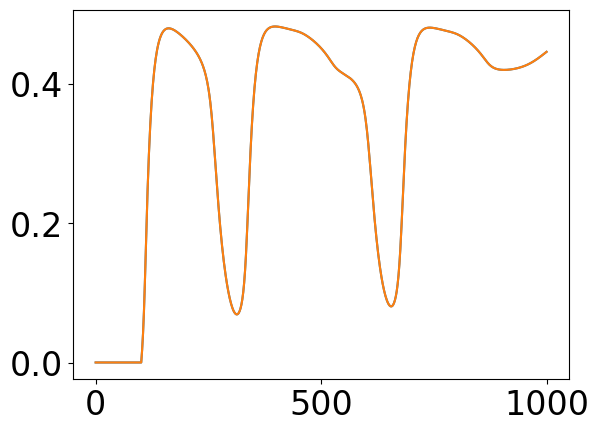

1 3 0
1 3 1
1 3 2
1 3 3
up state with osc decay


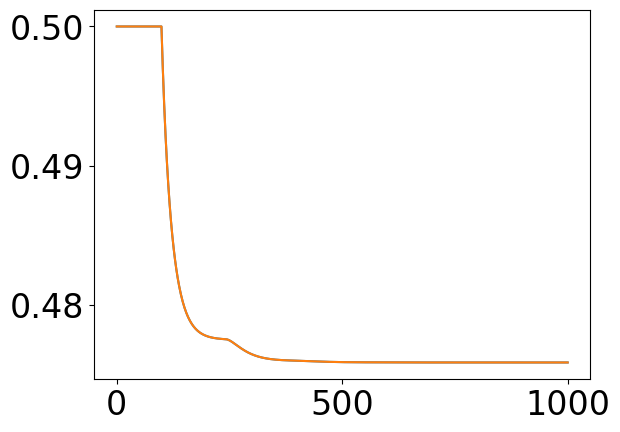

1 3 4
up state with osc decay


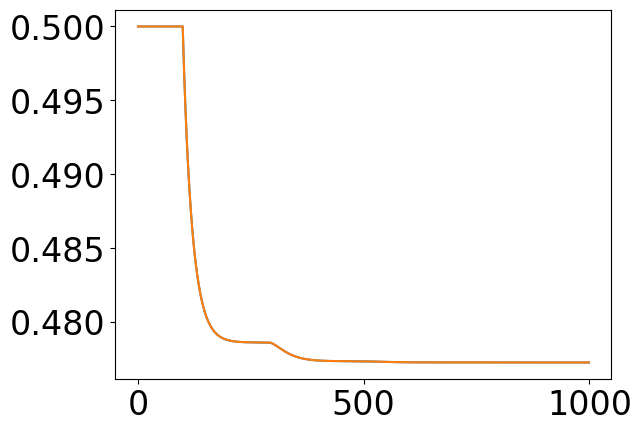

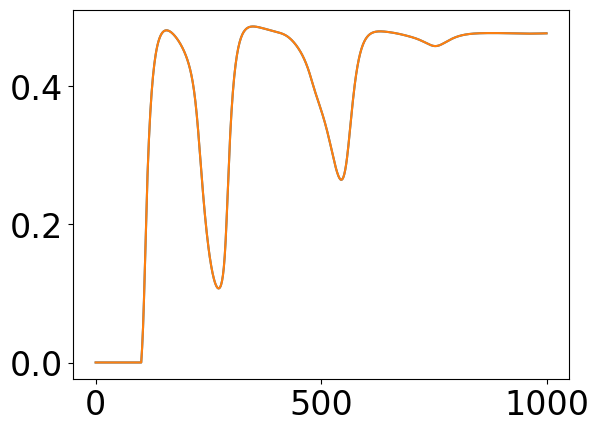

up state with osc decay


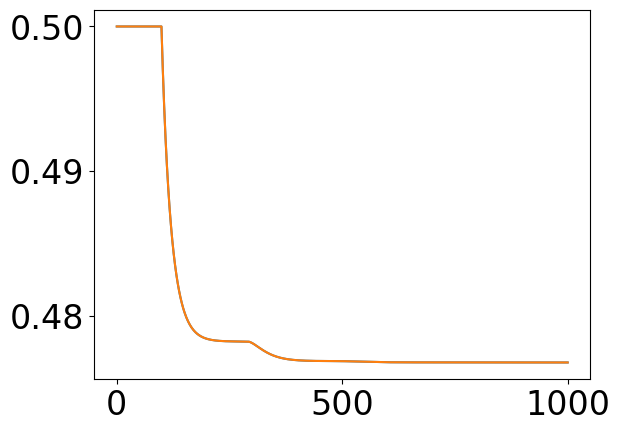

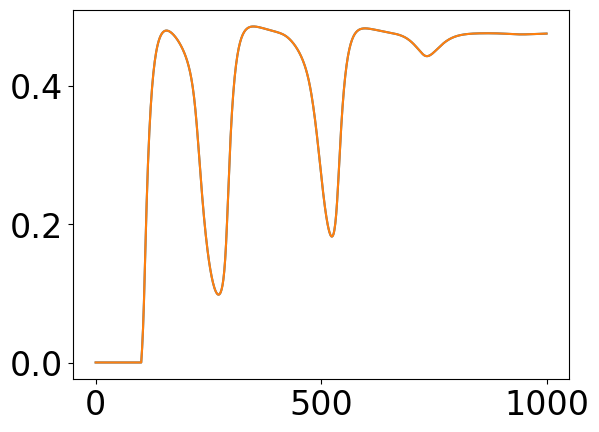

up state with osc decay


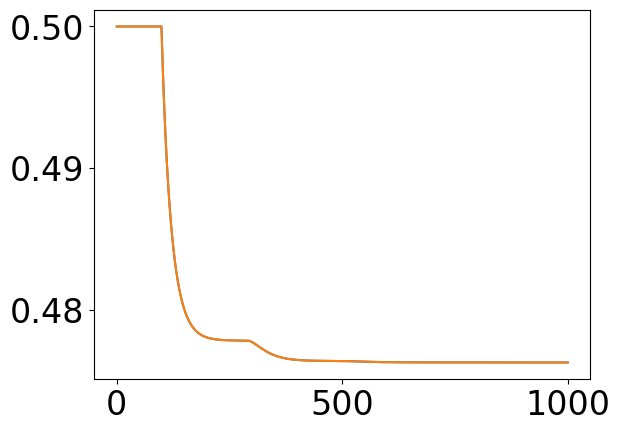

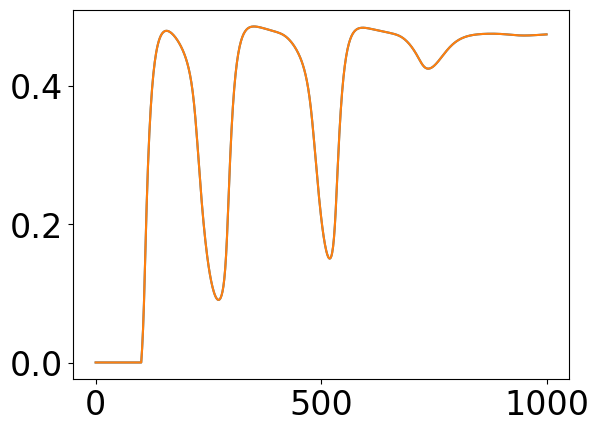

up state with osc decay


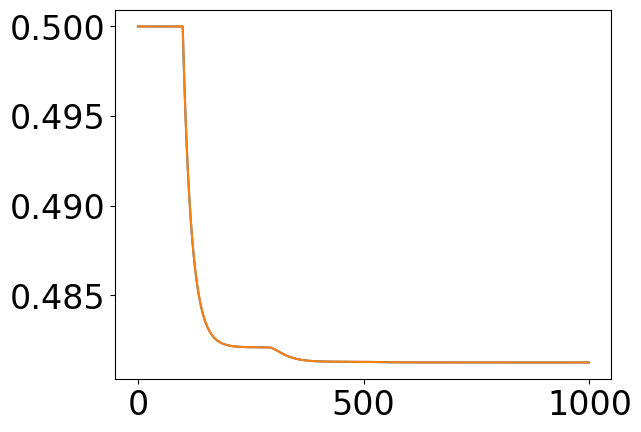

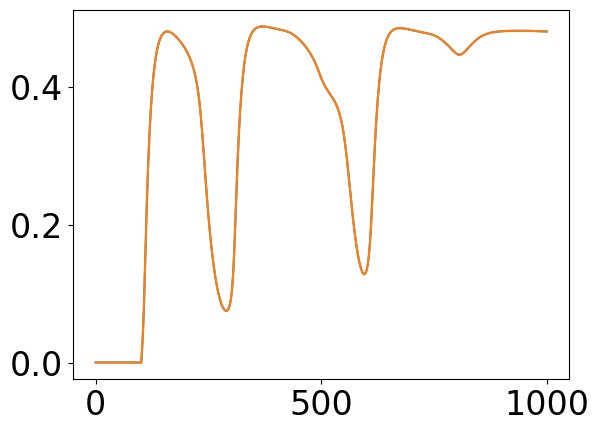

up state with osc decay


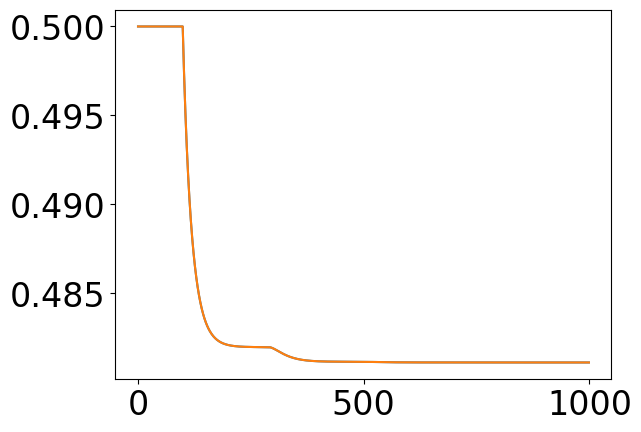

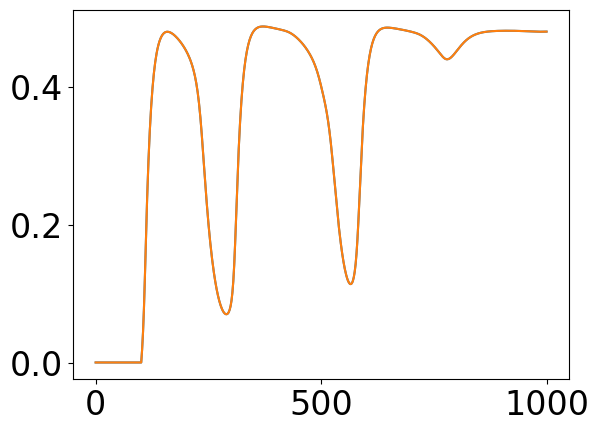

up state with osc decay


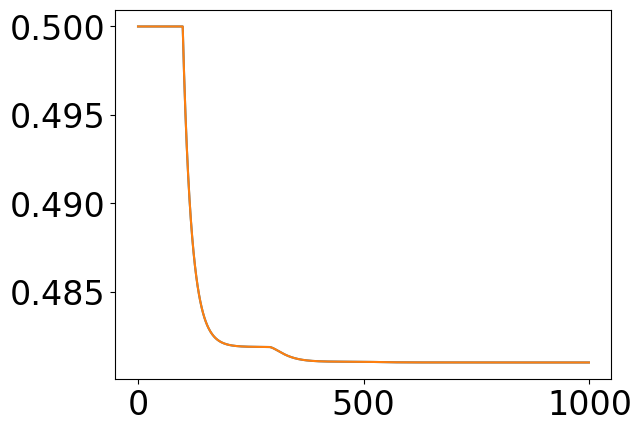

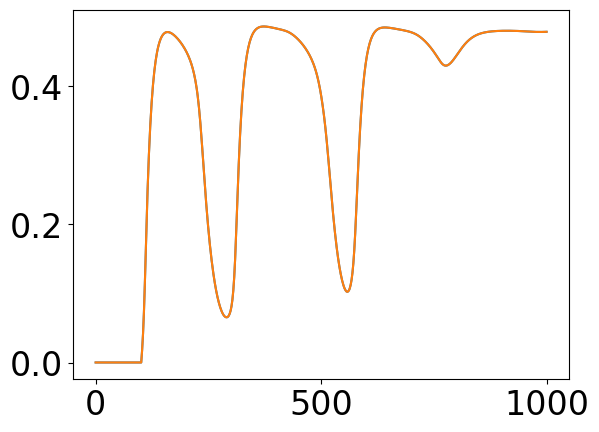

up state with osc decay


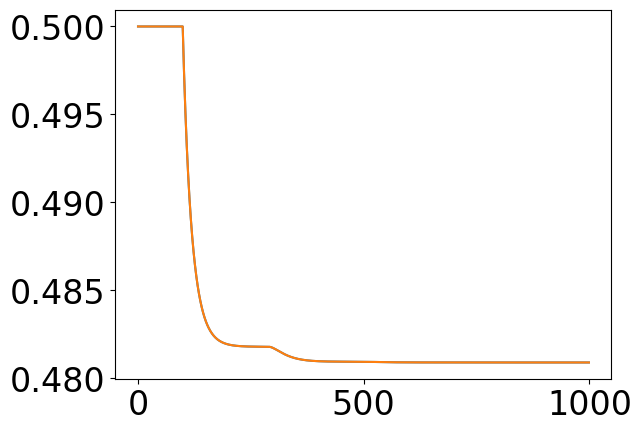

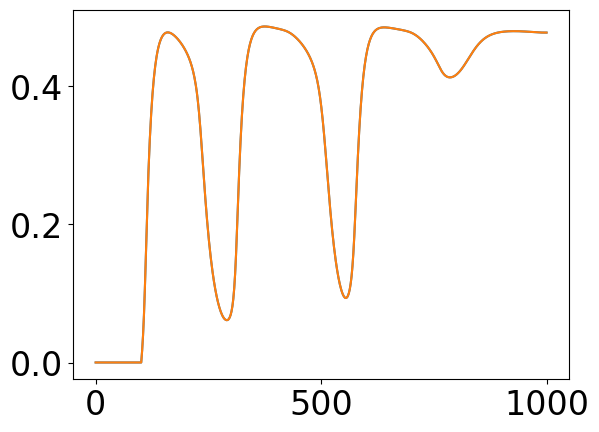

1 4 0
1 4 1
1 4 2
up state with osc decay


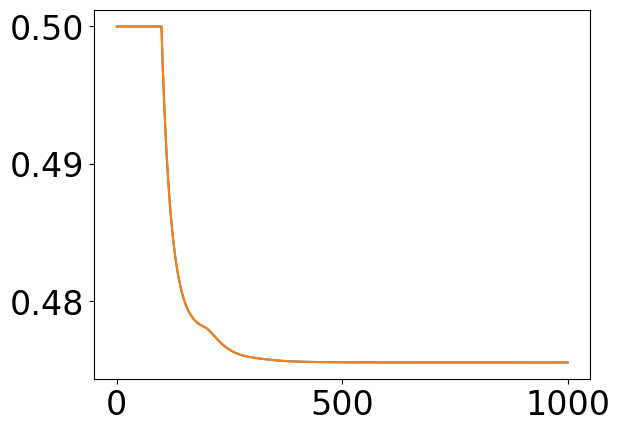

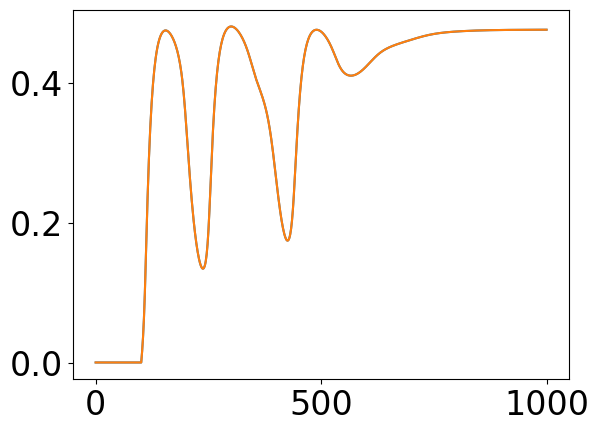

1 4 3
up state with osc decay


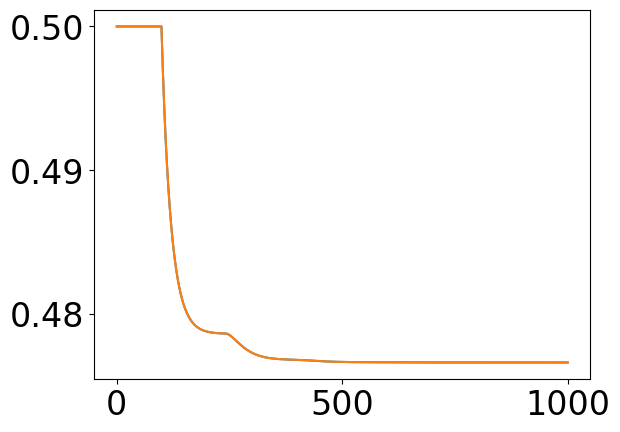

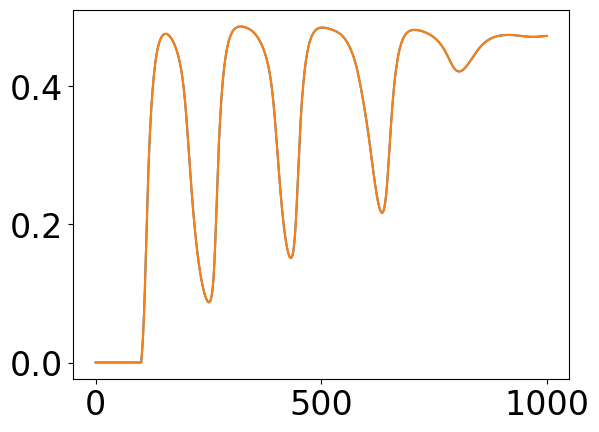

up state with osc decay


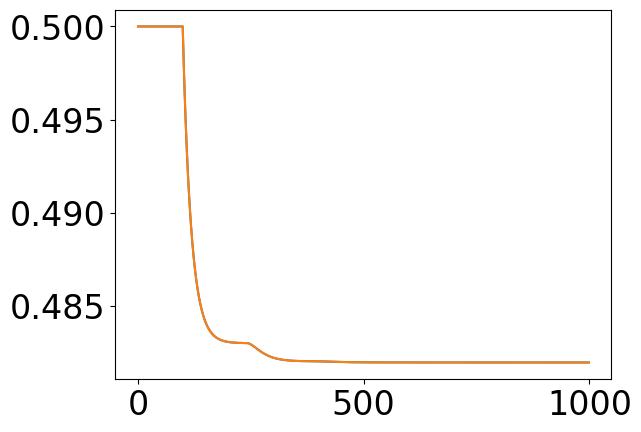

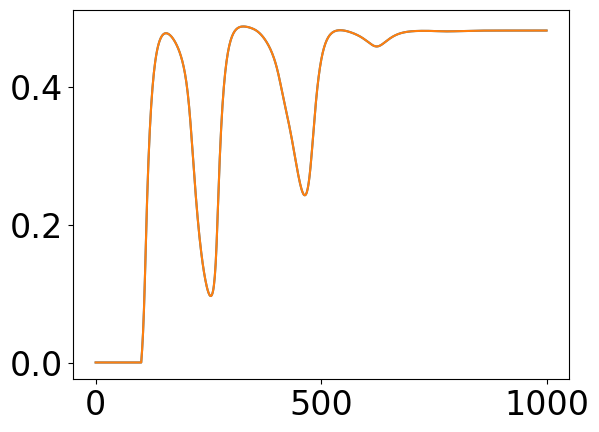

up state with osc decay


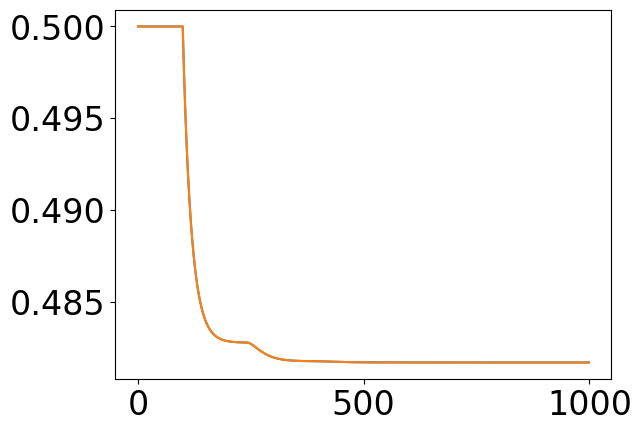

up state with osc decay


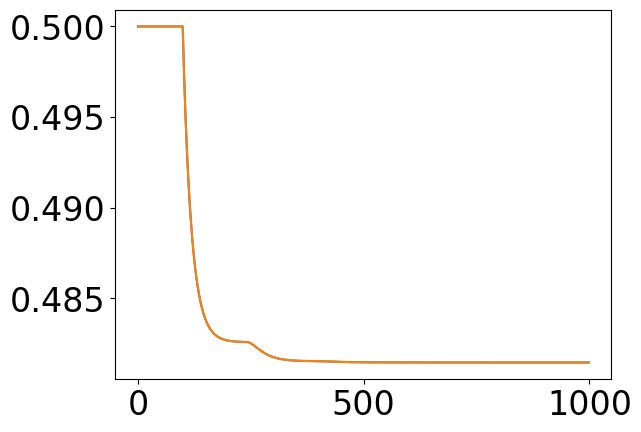

up state with osc decay


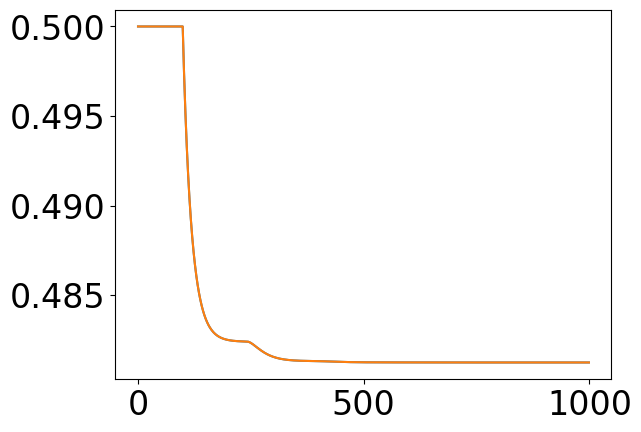

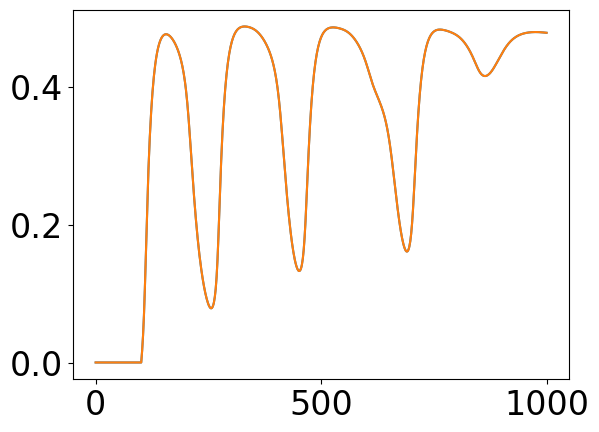

up state with osc decay


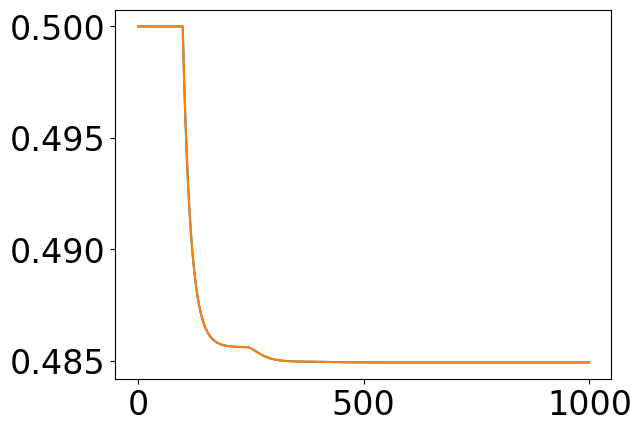

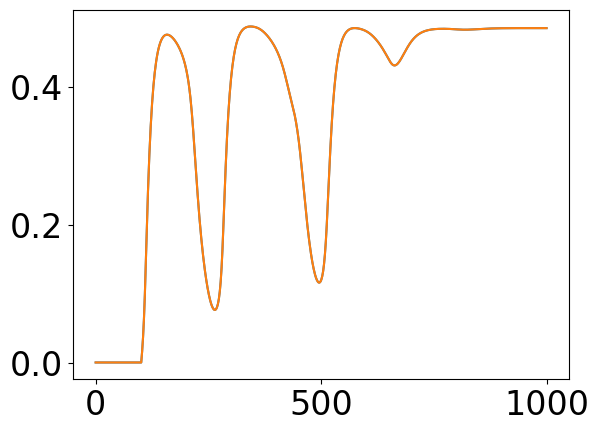

up state with osc decay


1 4 4
up state with osc decay


up state with osc decay


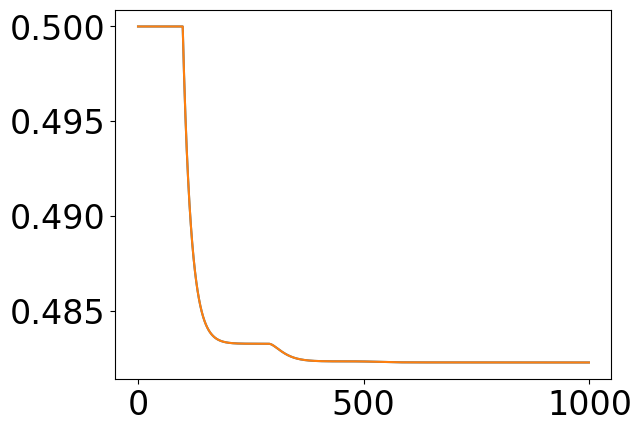

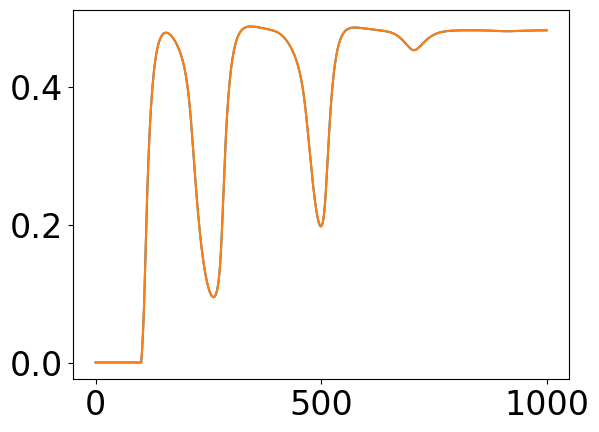

up state with osc decay


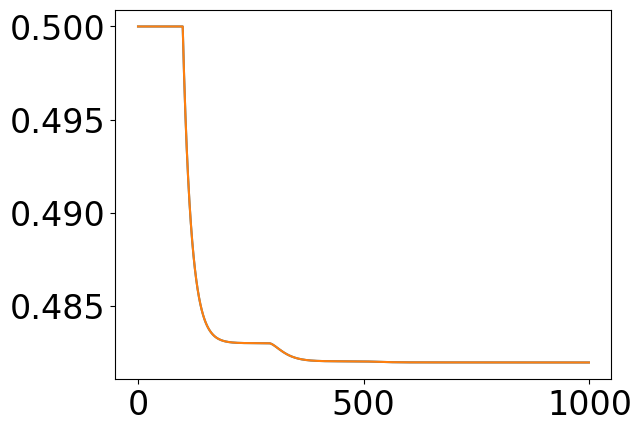

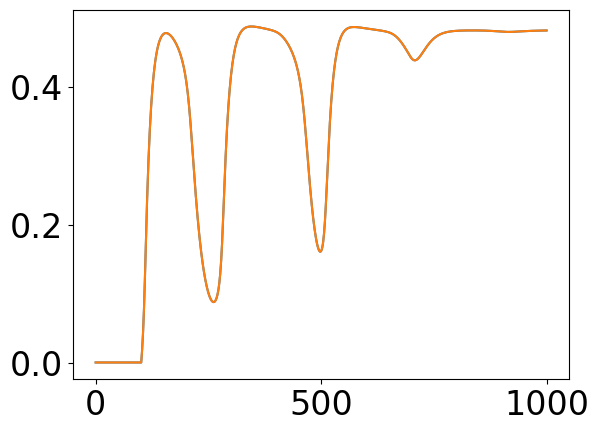

up state with osc decay


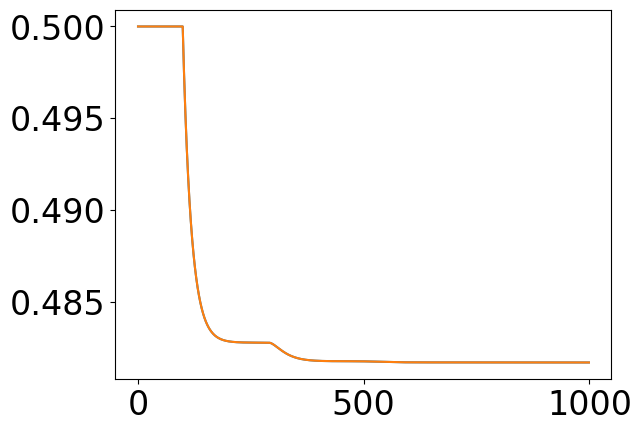

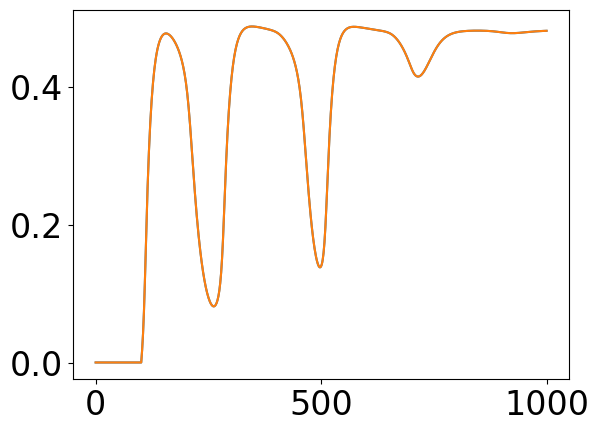

up state with osc decay


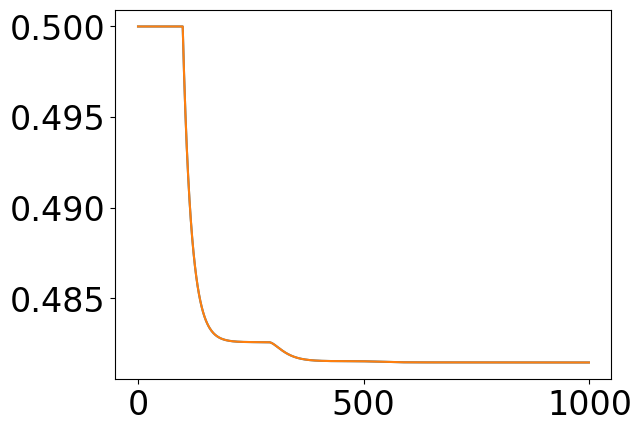

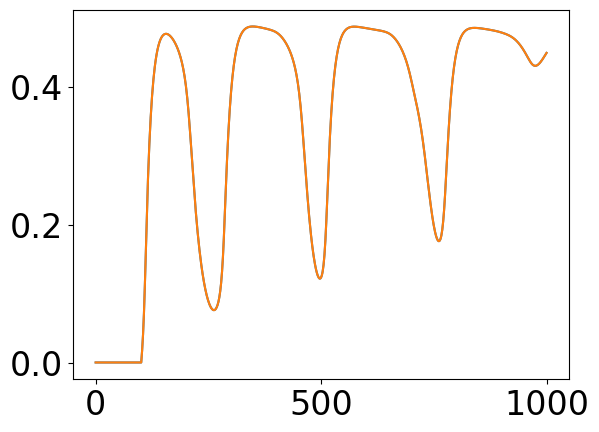

up state with osc decay


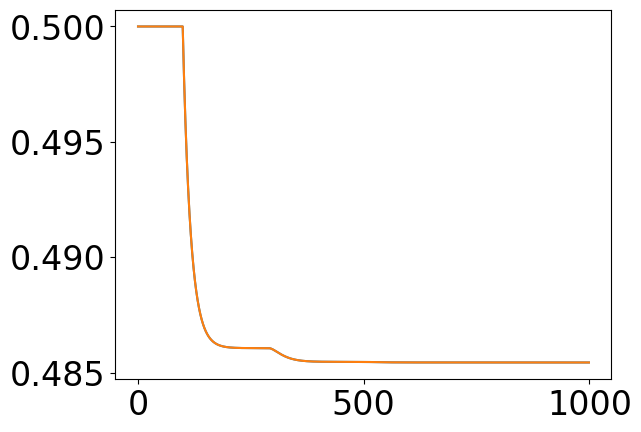

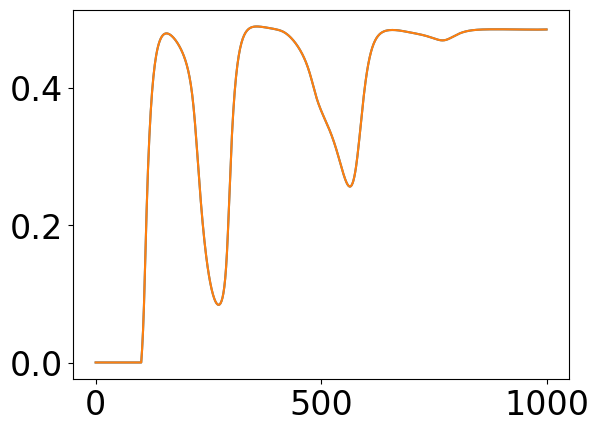

up state with osc decay


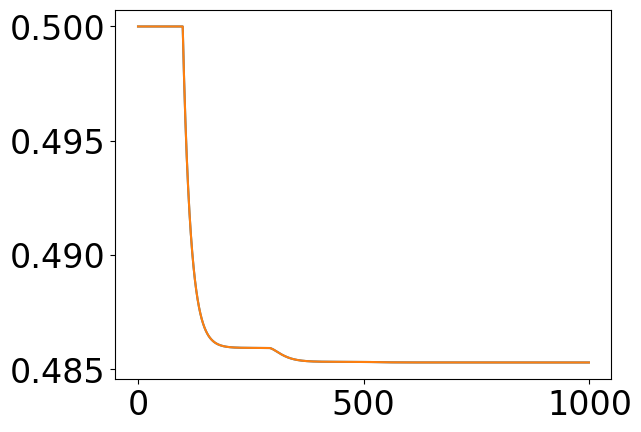

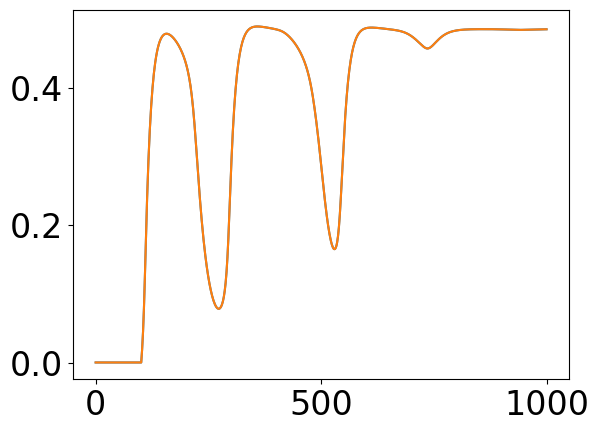

up state with osc decay


up state with osc decay


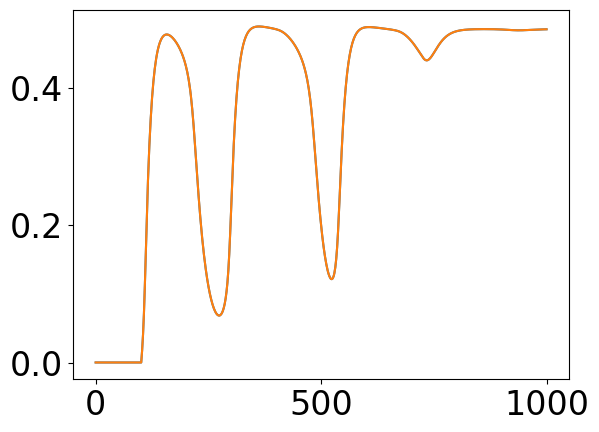

up state with osc decay


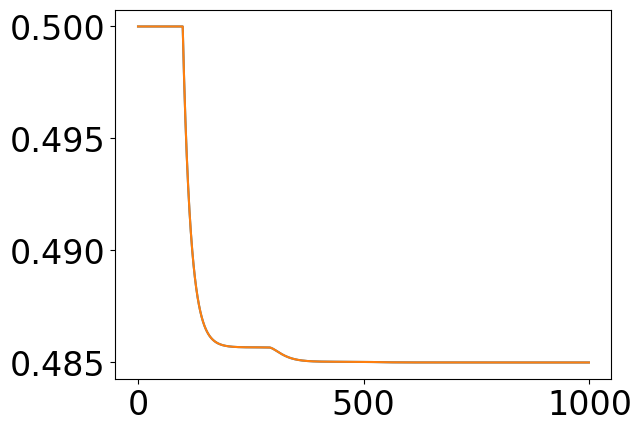

up state with osc decay


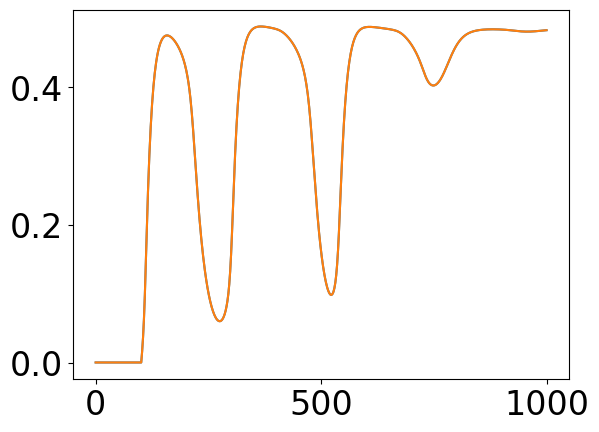

up state with osc decay


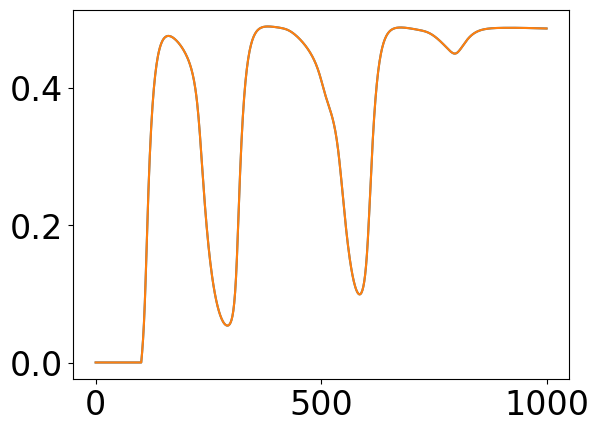

up state with osc decay


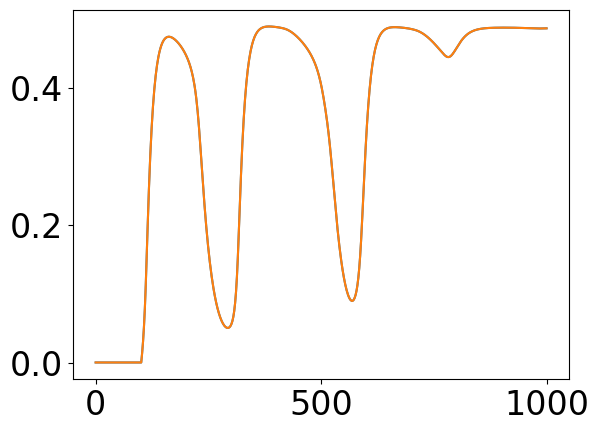

up state with osc decay


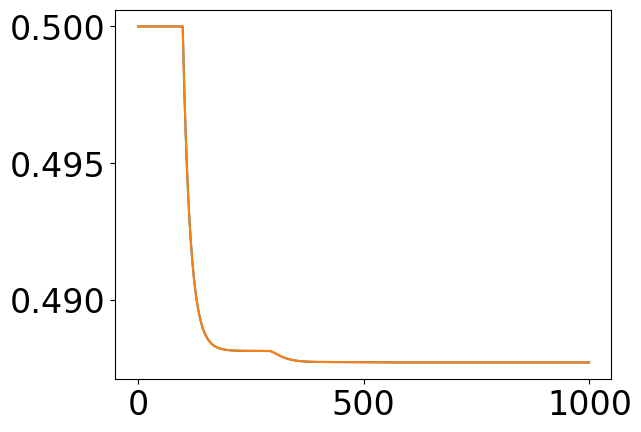

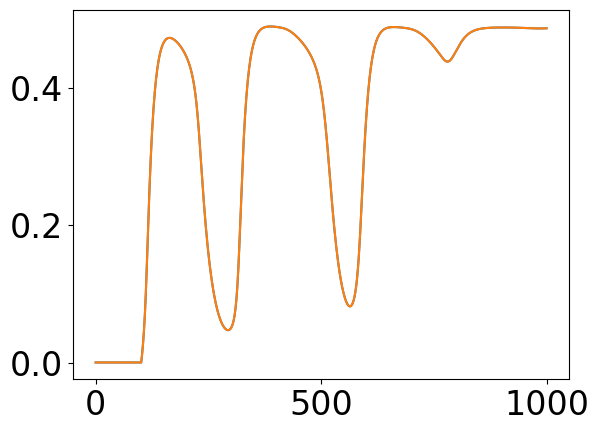

up state with osc decay


up state with osc decay


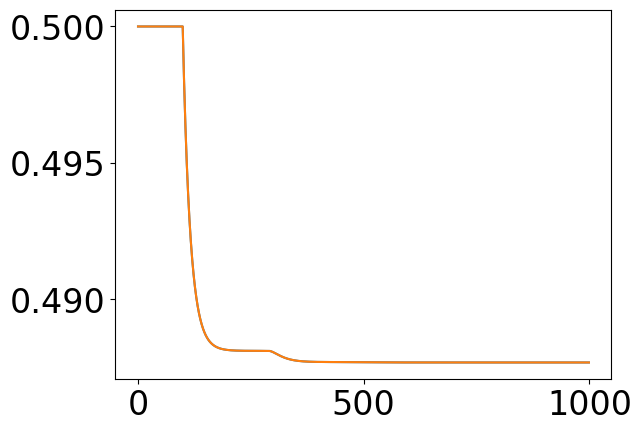

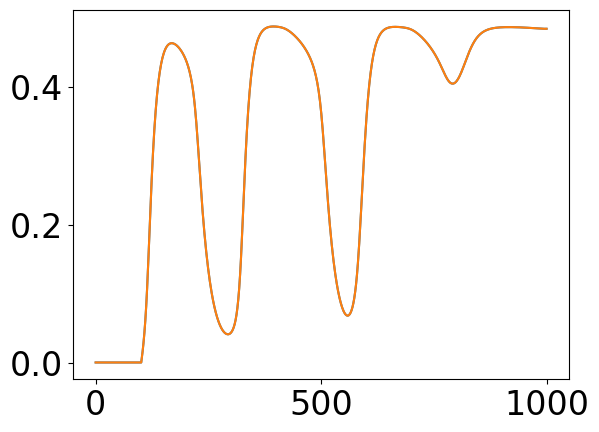

1 5 0
1 5 1
1 5 2
1 5 3
1 5 4
1 6 0
1 6 1
1 6 2
up state with osc decay


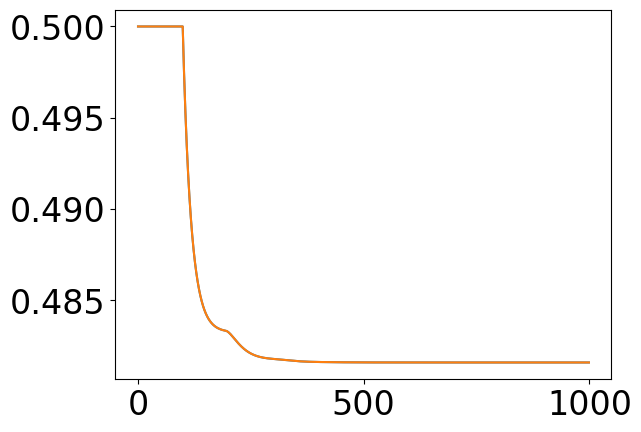

up state with osc decay


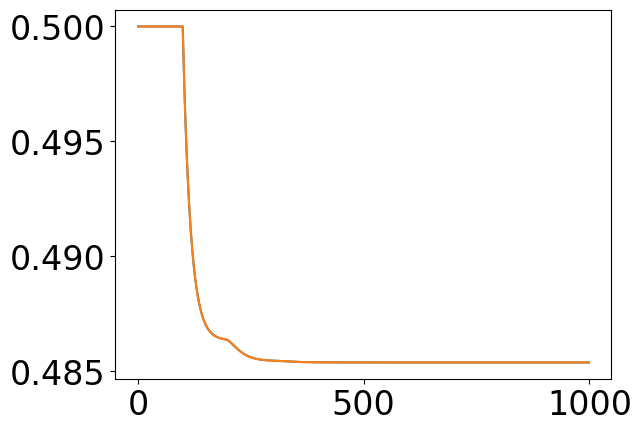

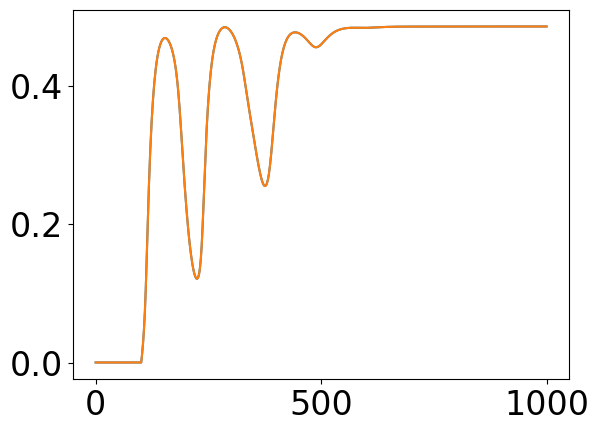

up state with osc decay


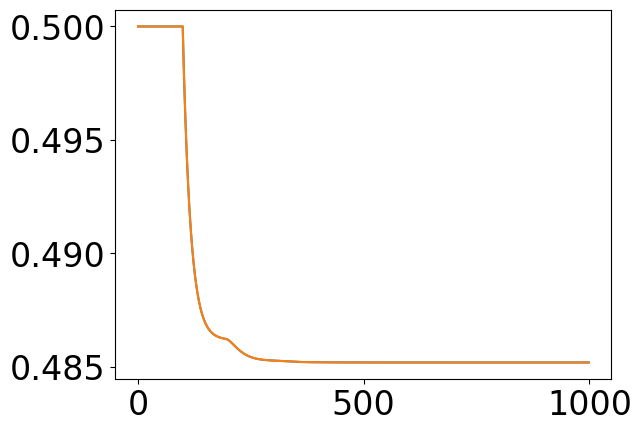

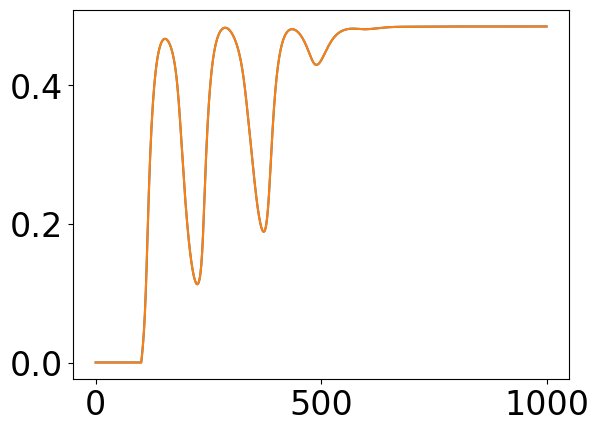

up state with osc decay


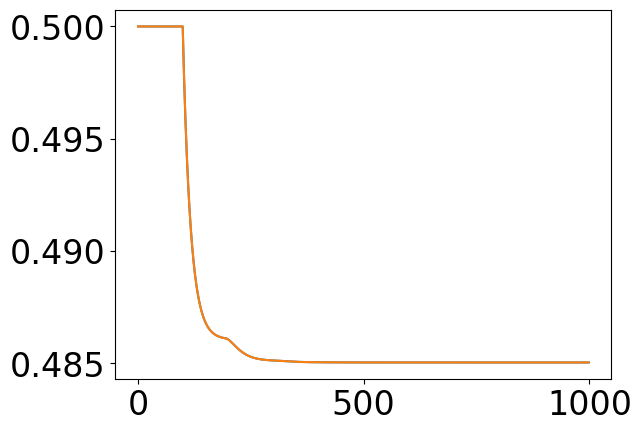

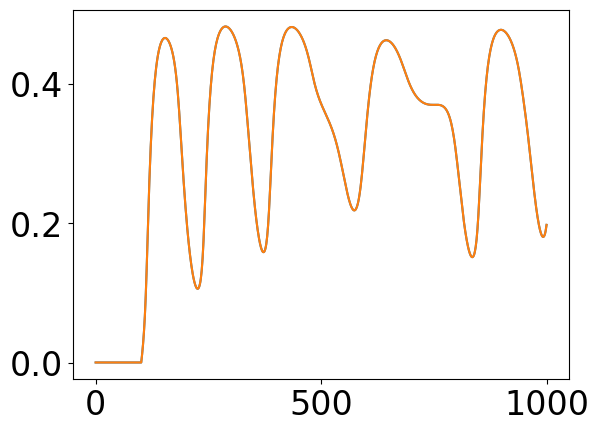

up state with osc decay


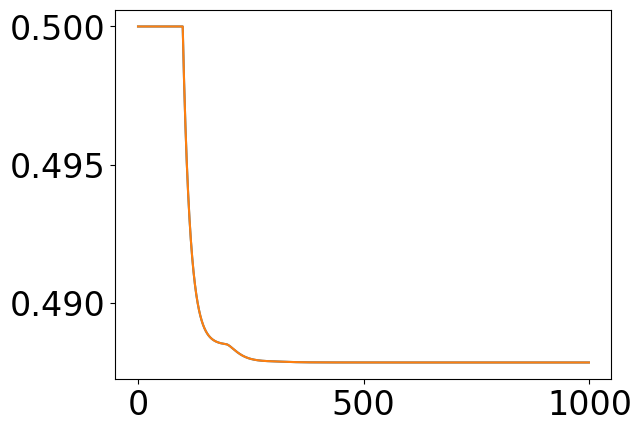

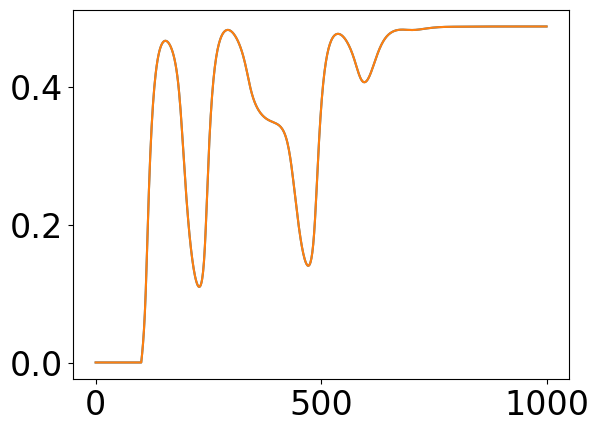

up state with osc decay


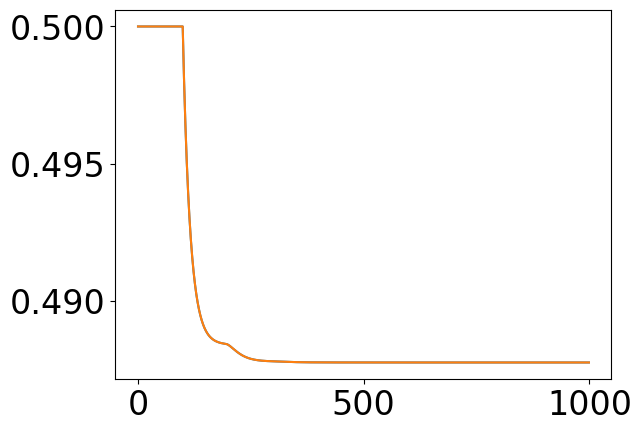

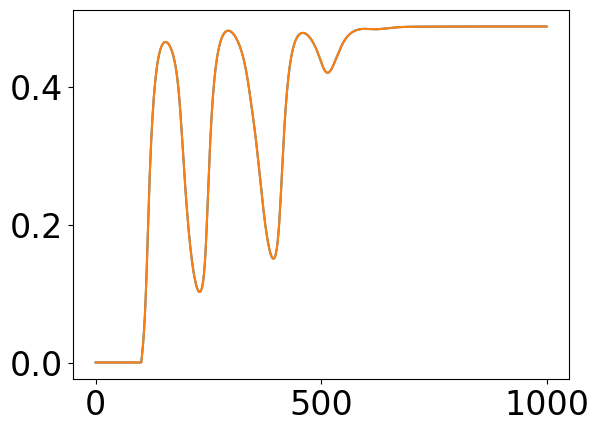

up state with osc decay


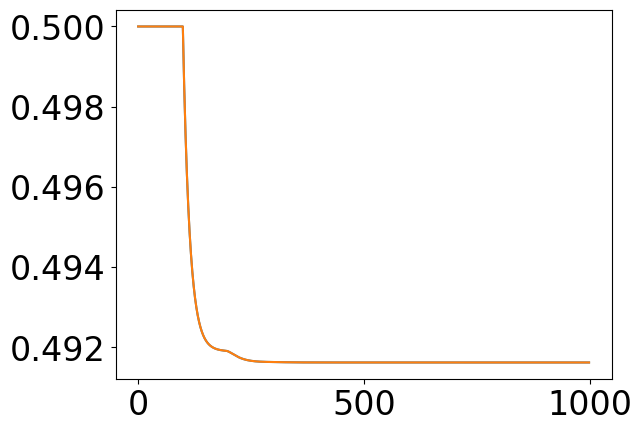

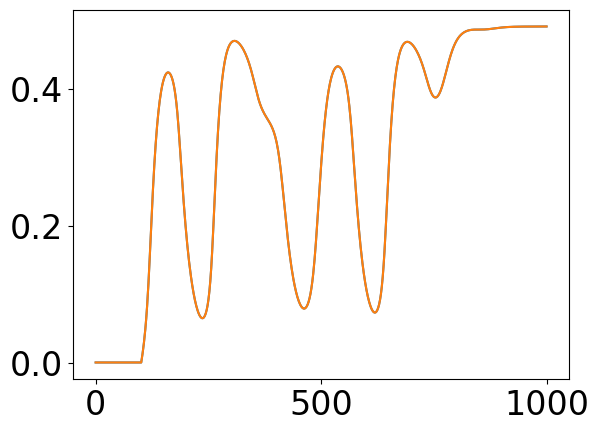

up state with osc decay


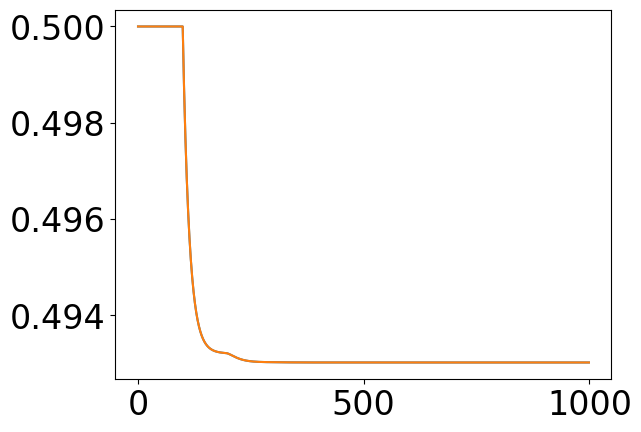

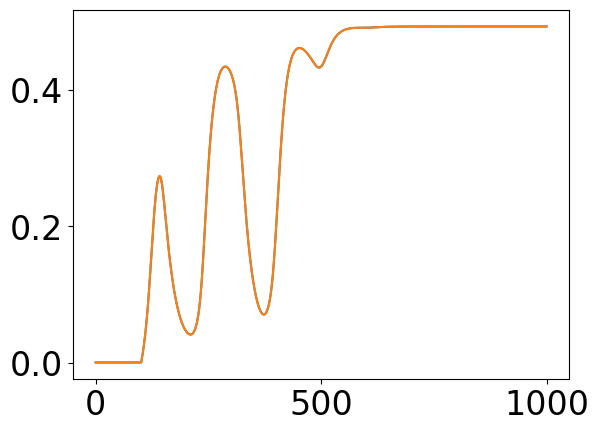

up state with osc decay


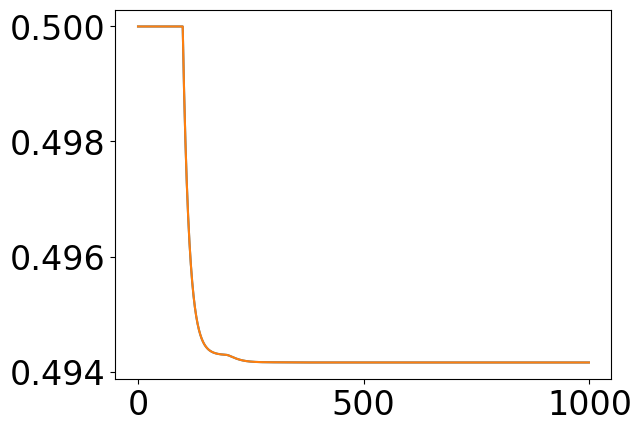

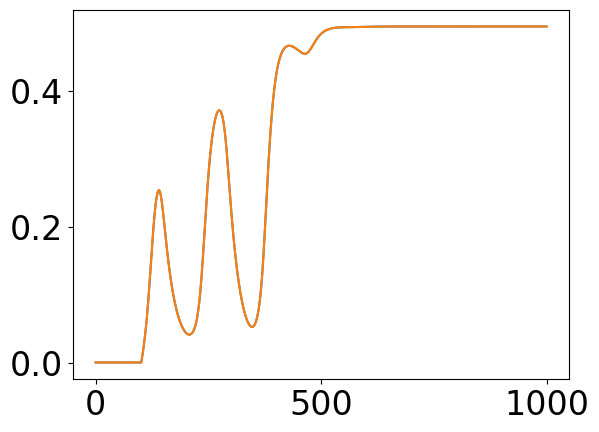

up state with osc decay


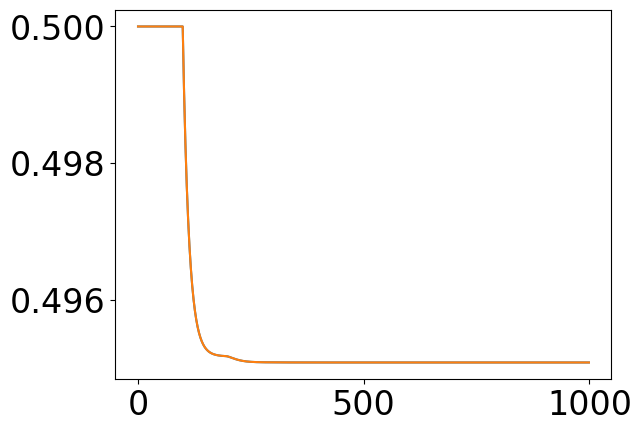

1 6 3
up state with osc decay


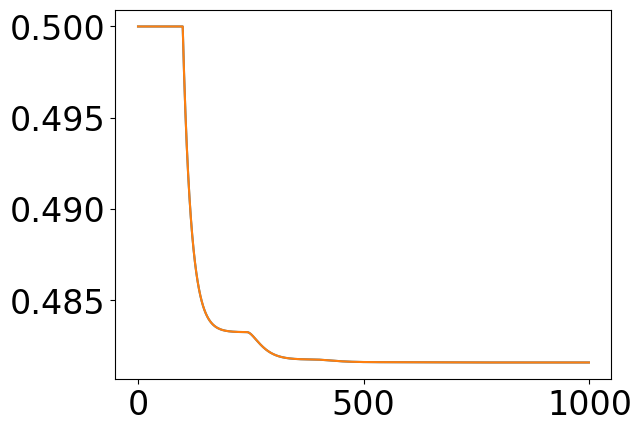

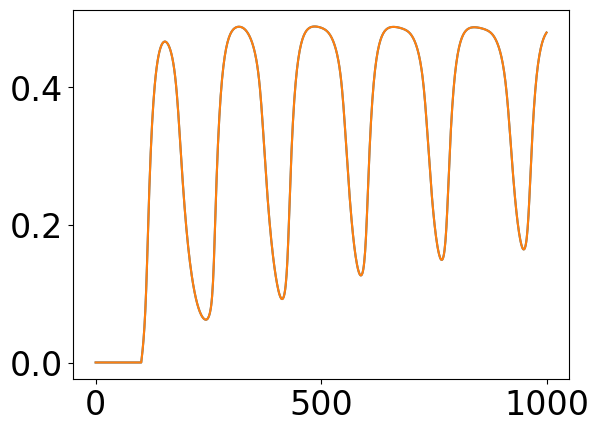

up state with osc decay


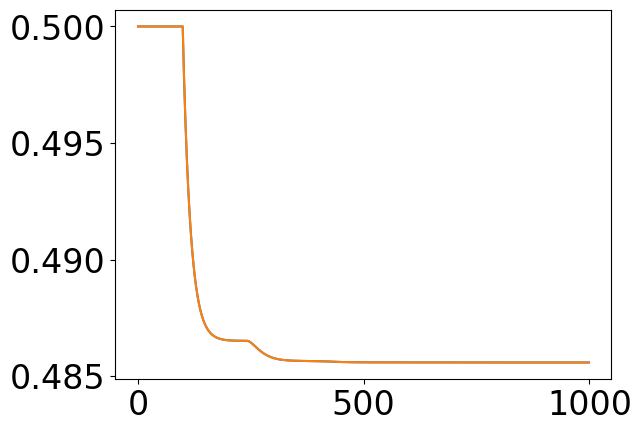

up state with osc decay


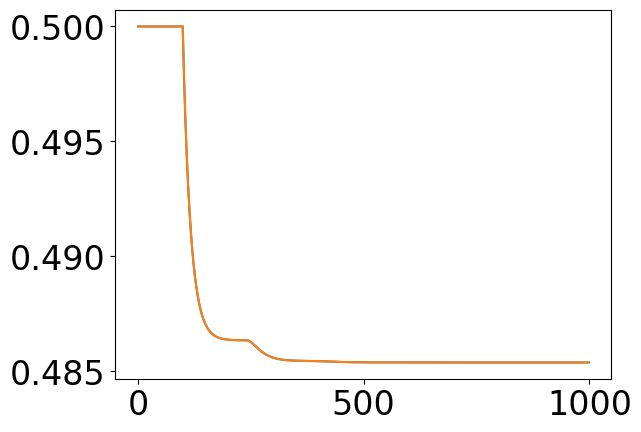

up state with osc decay


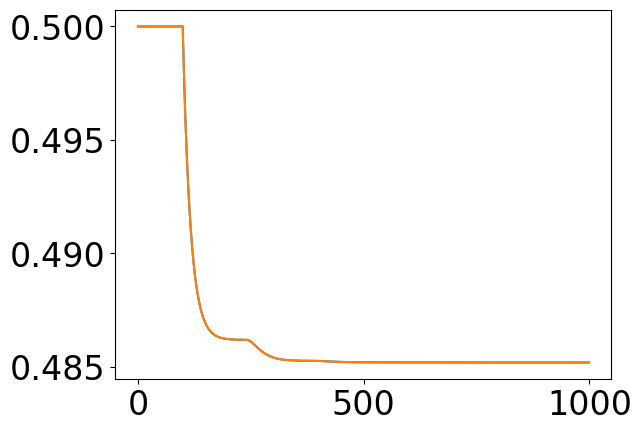

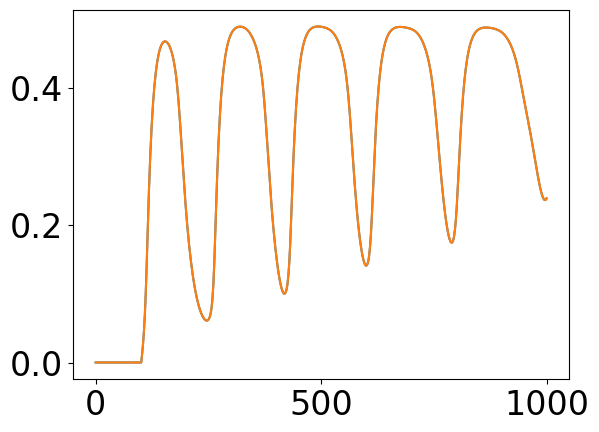

up state with osc decay


up state with osc decay


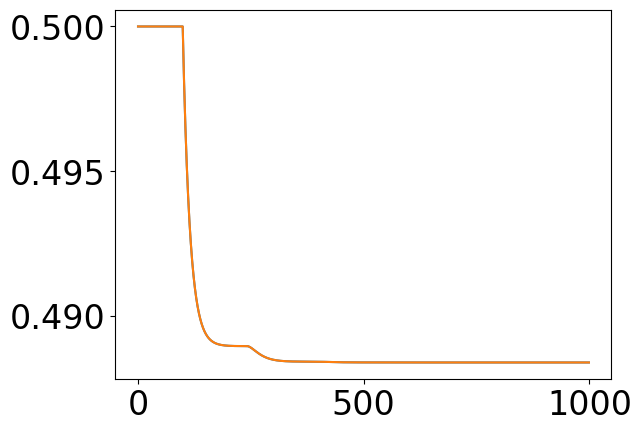

up state with osc decay


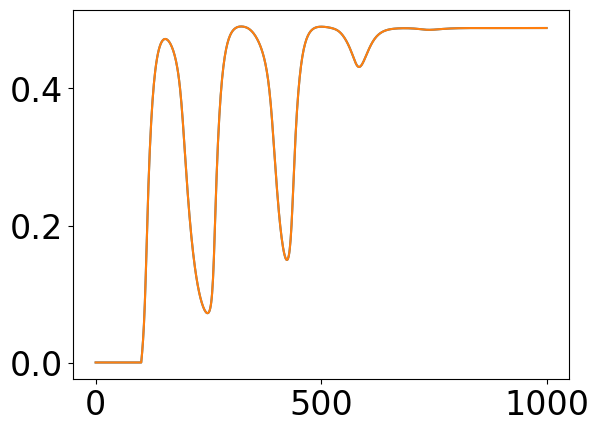

up state with osc decay


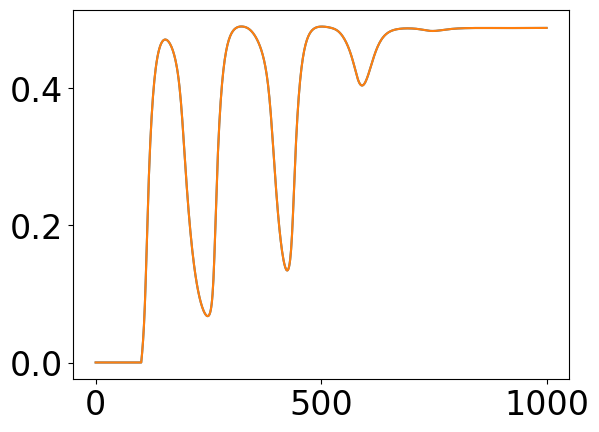

up state with osc decay


up state with osc decay


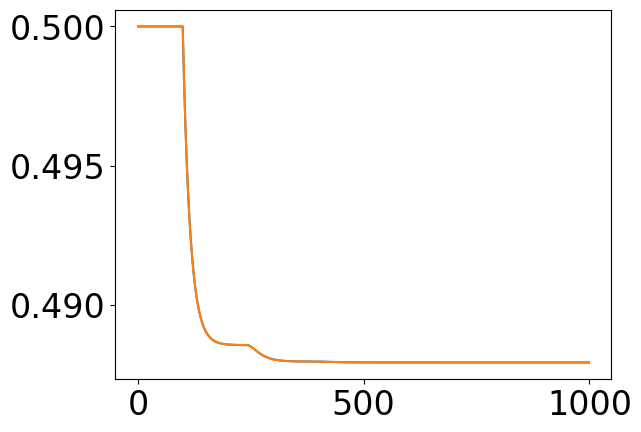

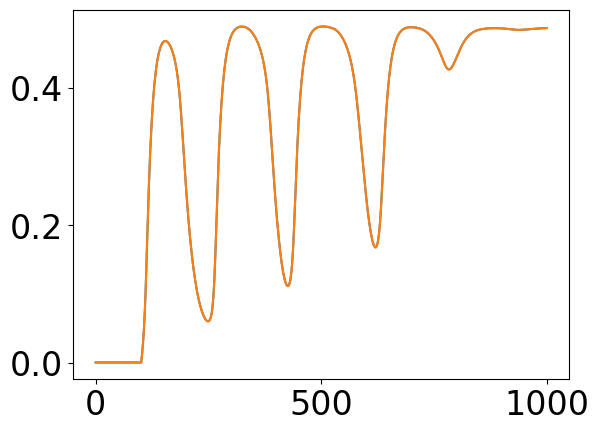

up state with osc decay


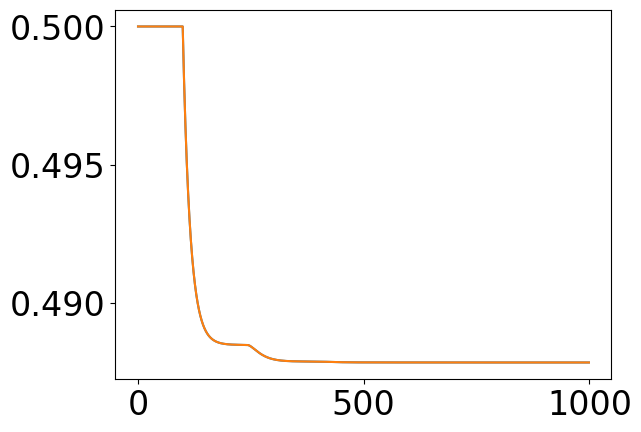

up state with osc decay


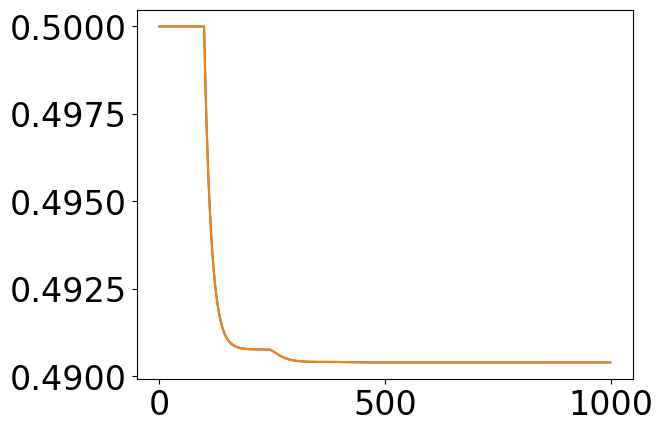

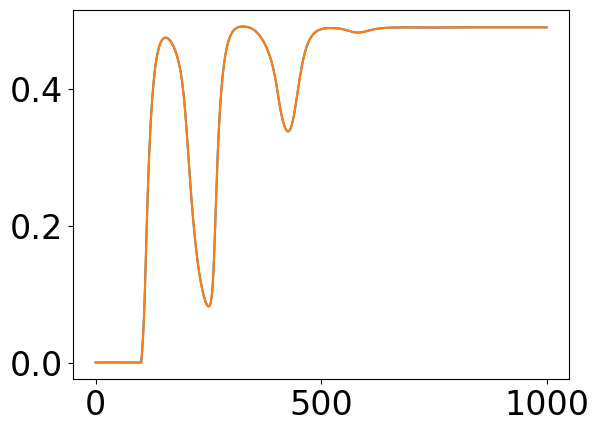

up state with osc decay


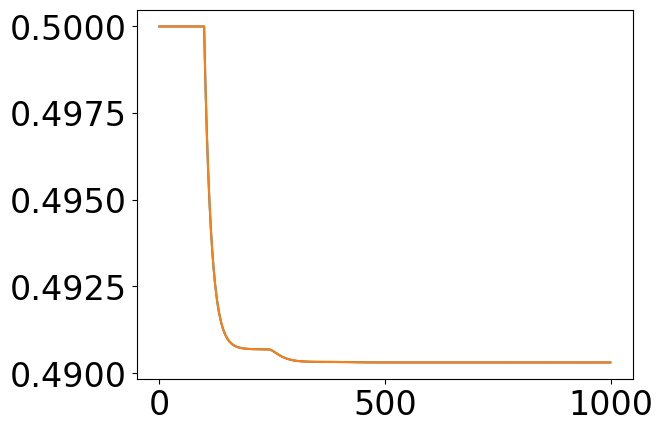

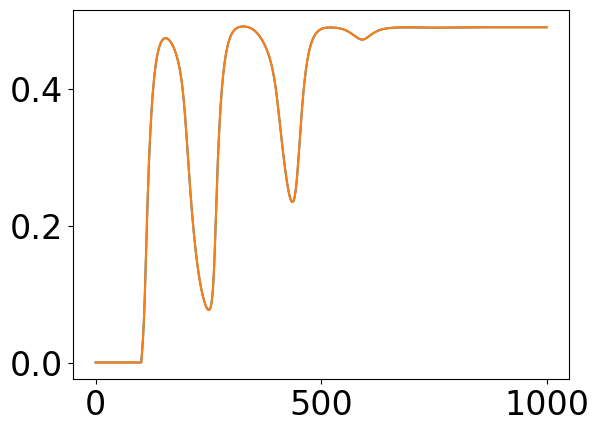

up state with osc decay


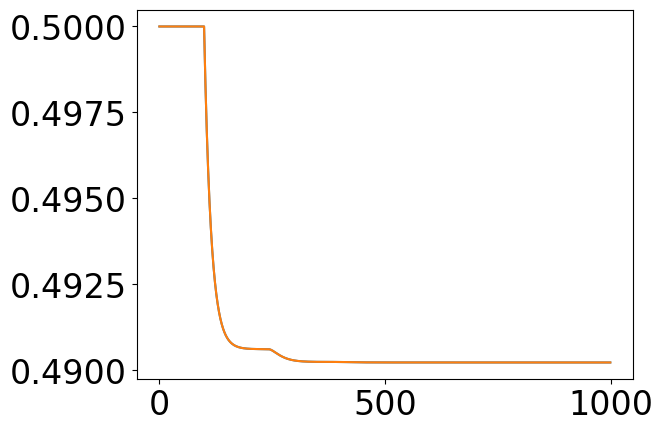

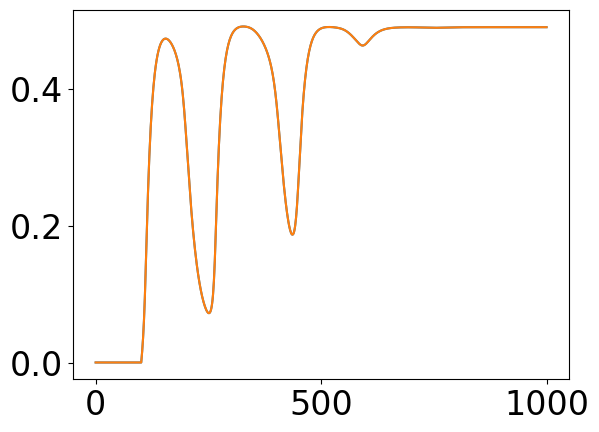

up state with osc decay


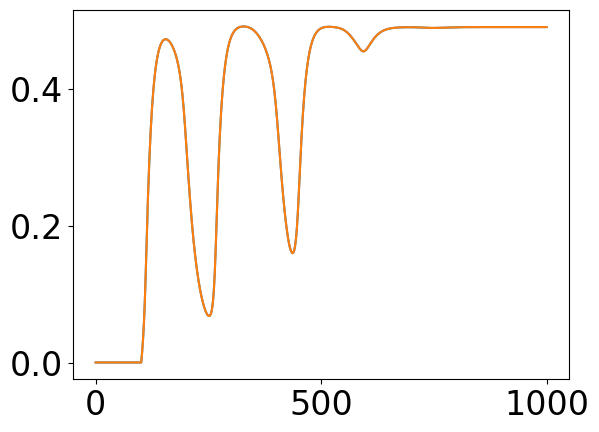

up state with osc decay


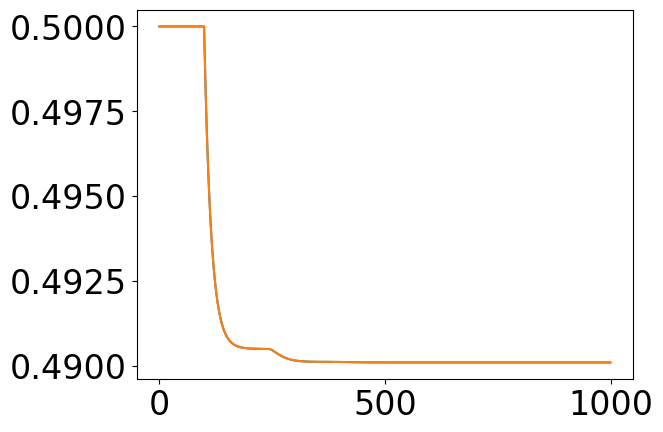

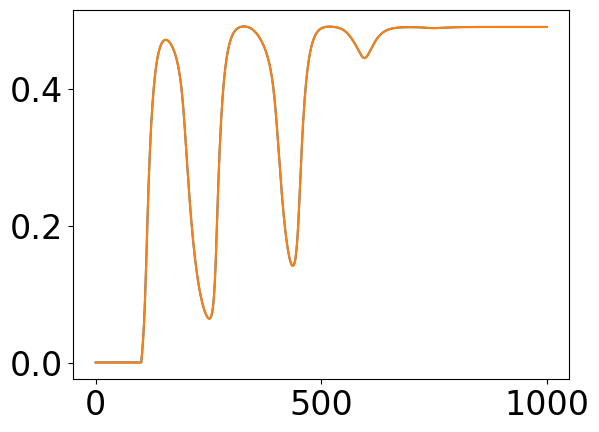

up state with osc decay


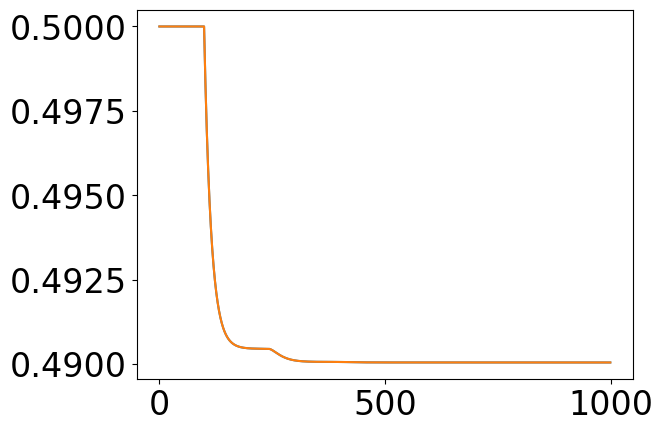

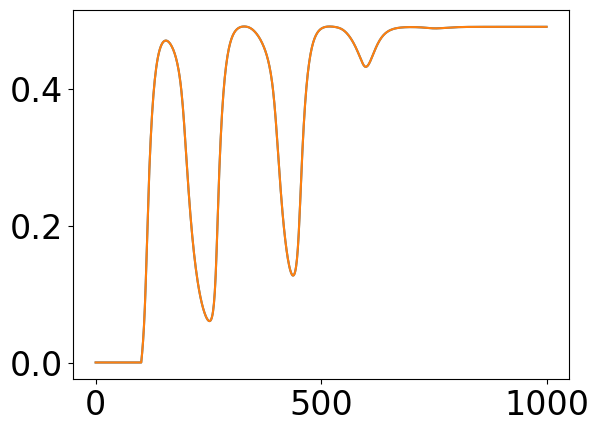

up state with osc decay


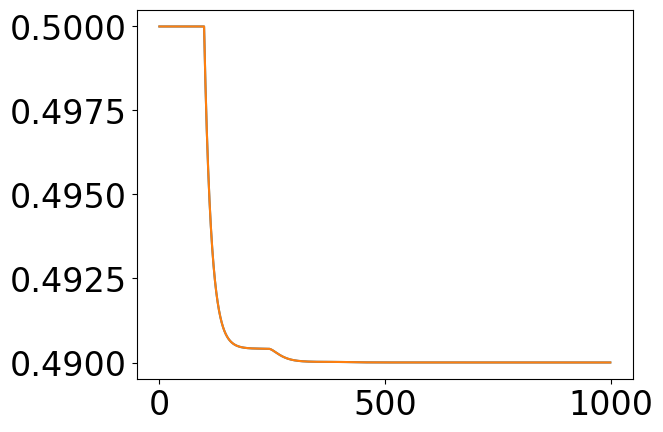

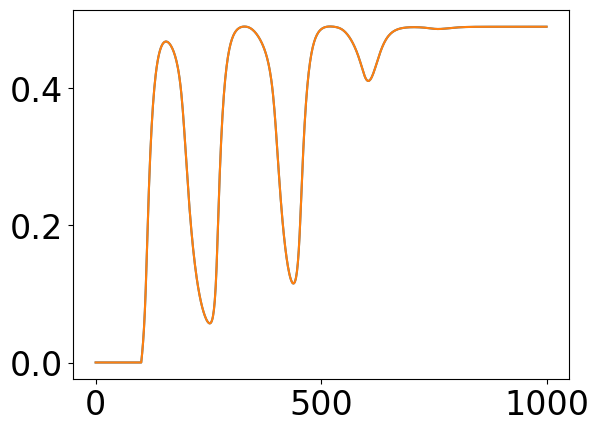

up state with osc decay


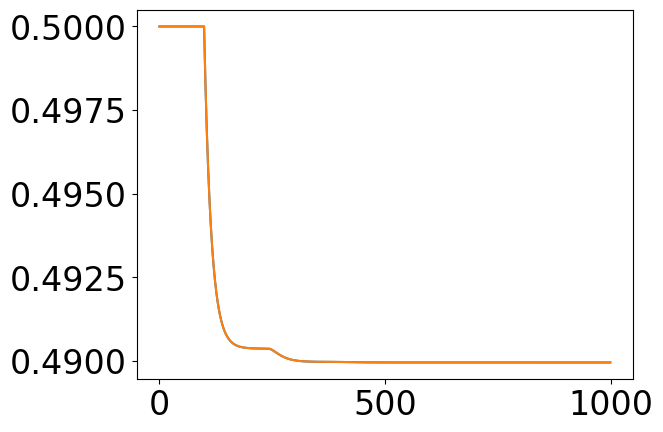

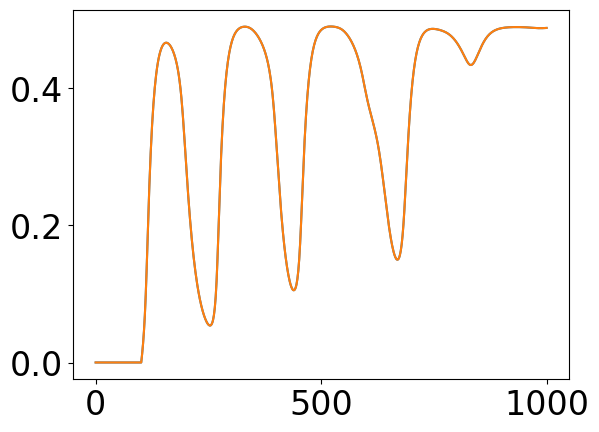

up state with osc decay


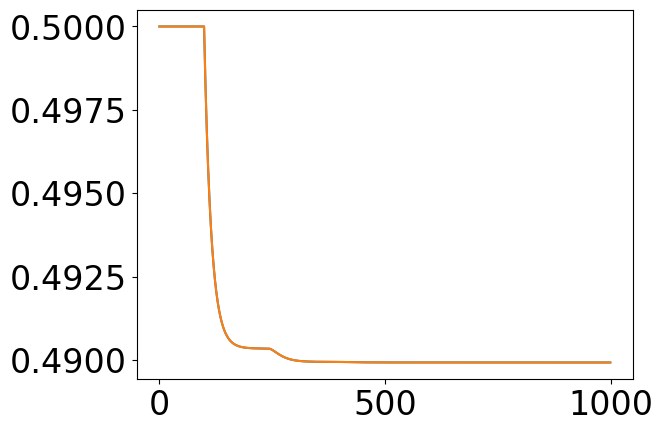

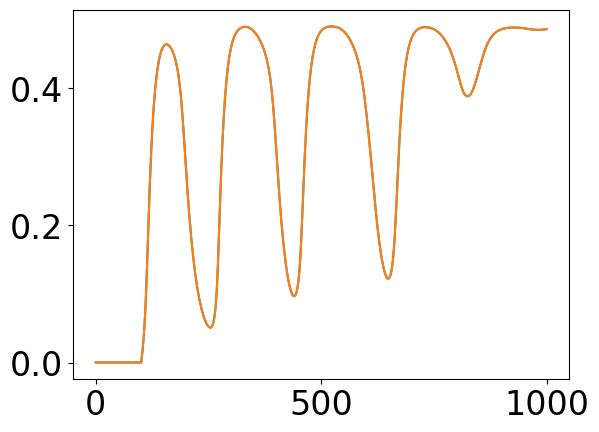

up state with osc decay


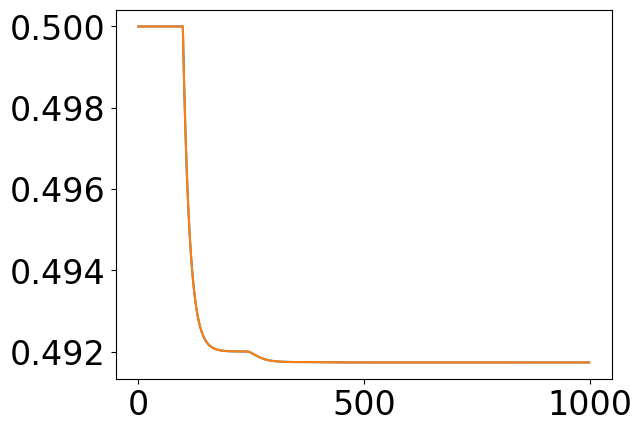

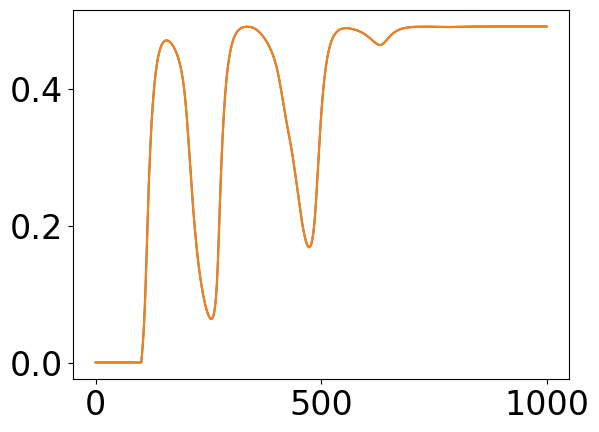

up state with osc decay


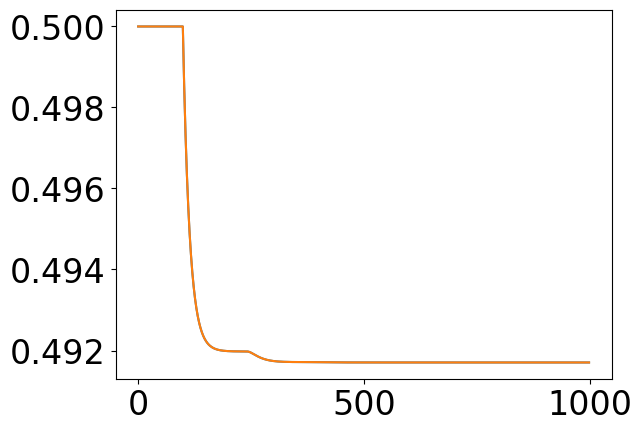

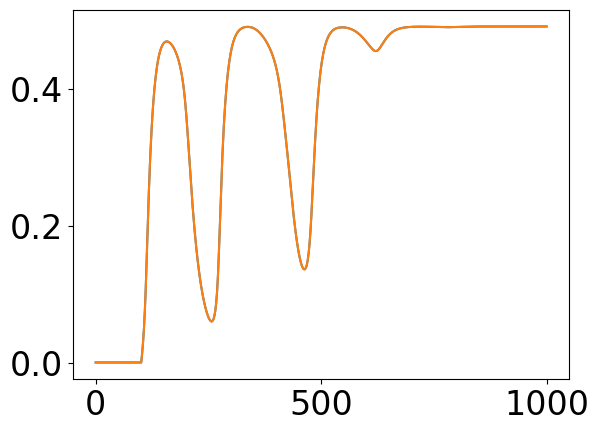

up state with osc decay


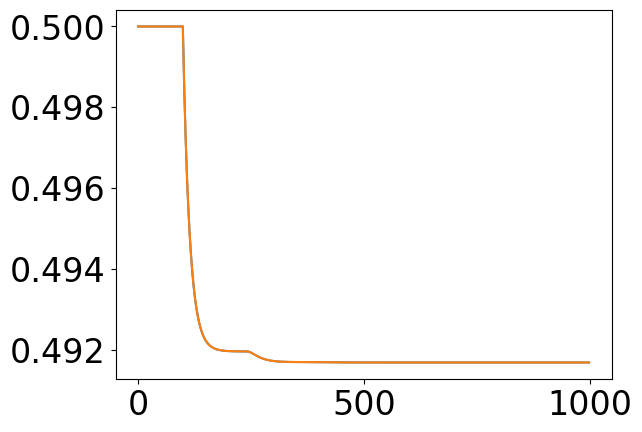

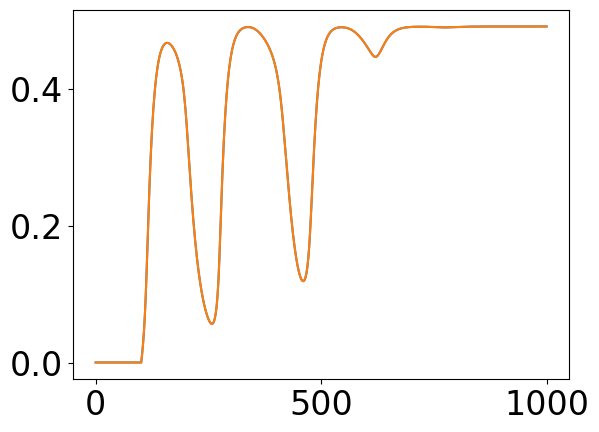

up state with osc decay


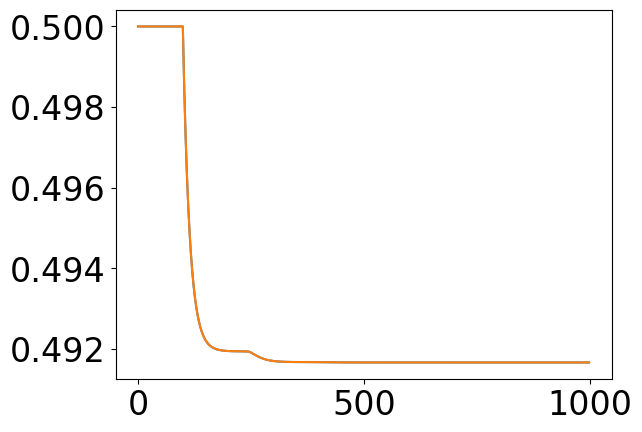

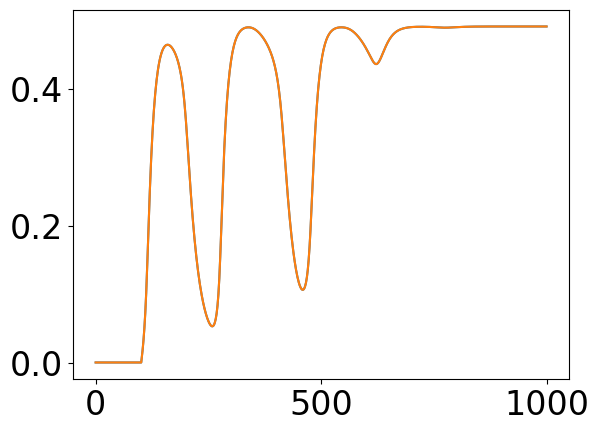

up state with osc decay


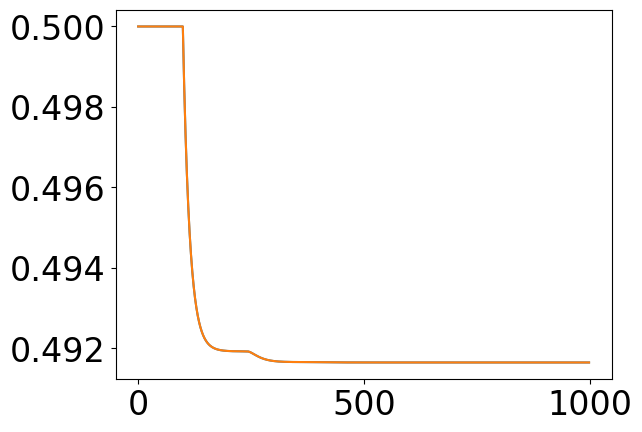

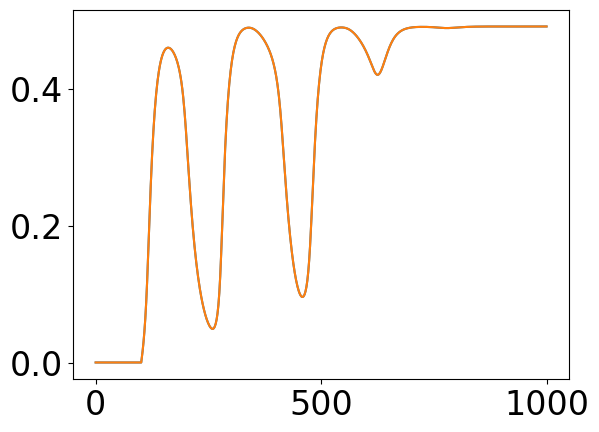

up state with osc decay


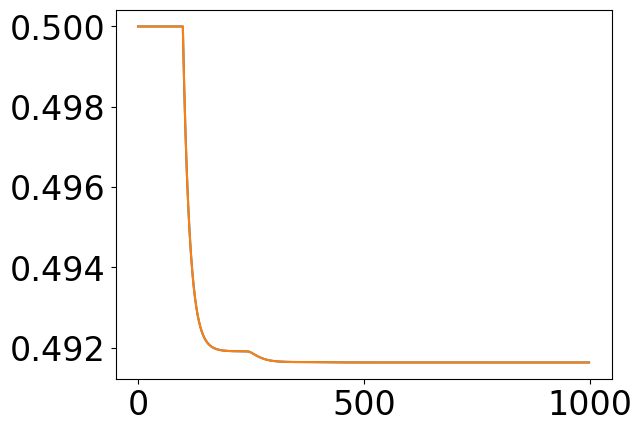

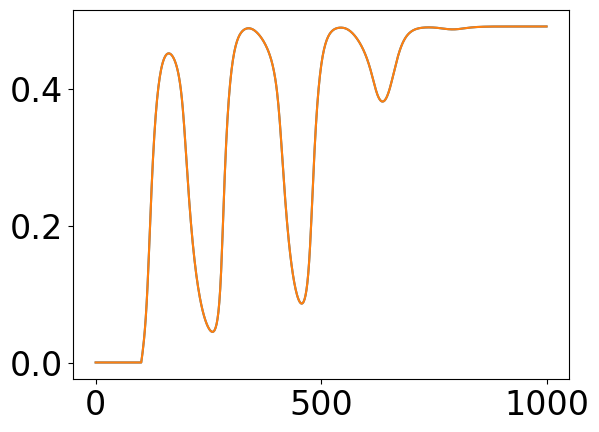

up state with osc decay


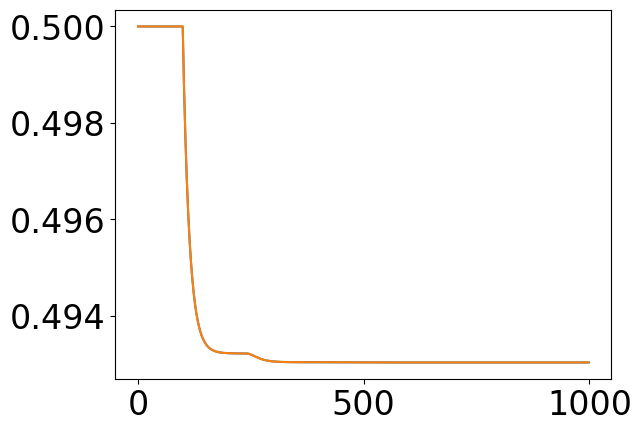

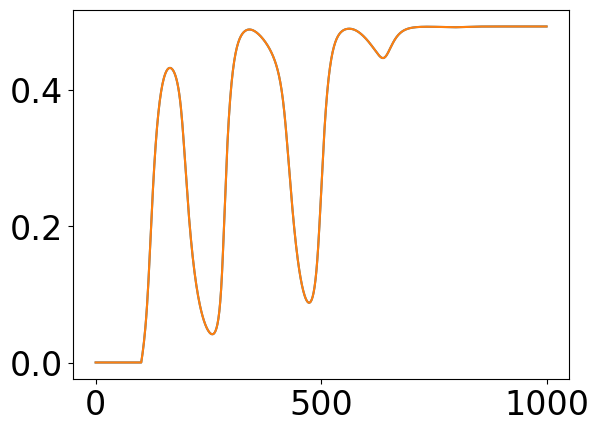

up state with osc decay


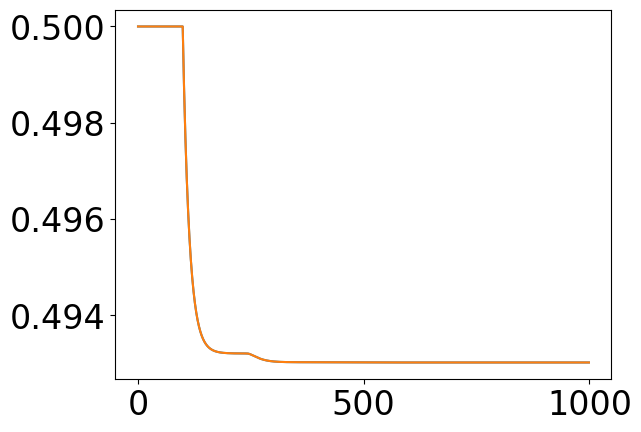

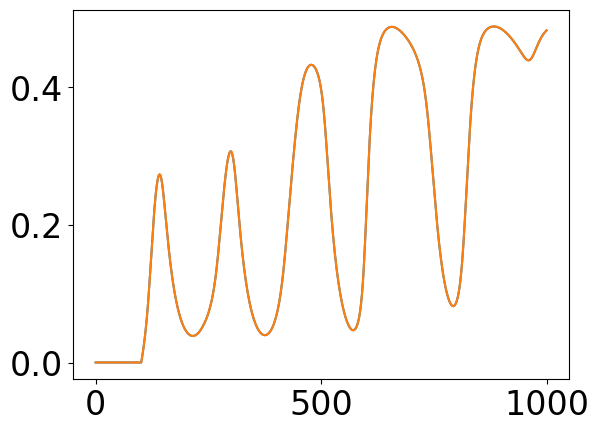

1 6 4
up state with osc decay


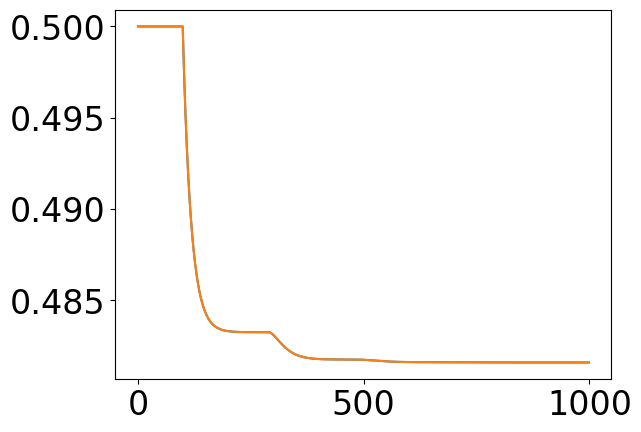

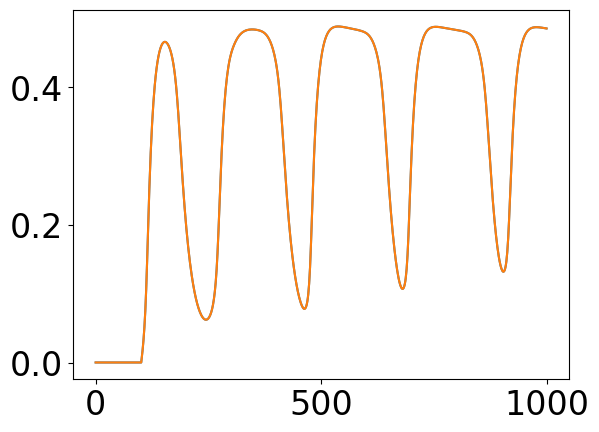

up state with osc decay


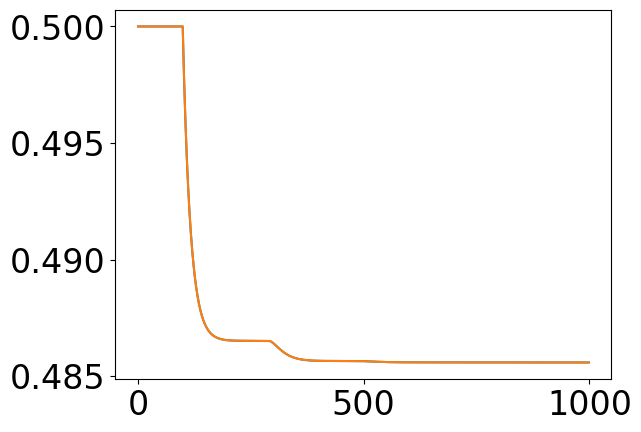

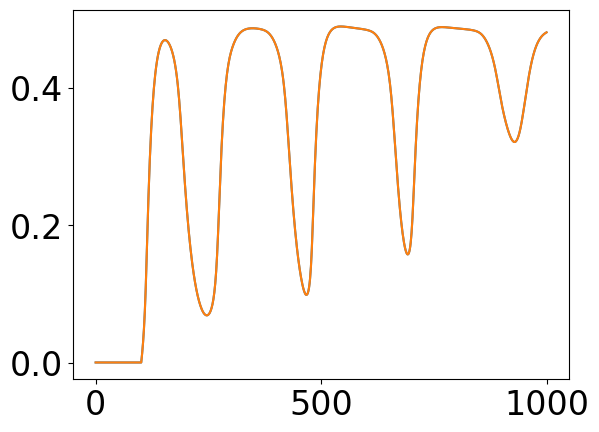

up state with osc decay


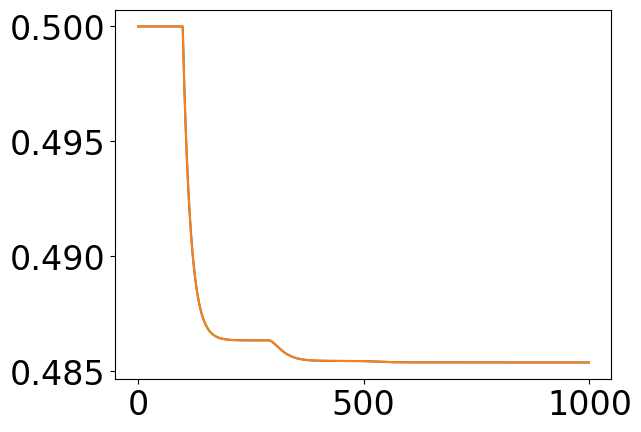

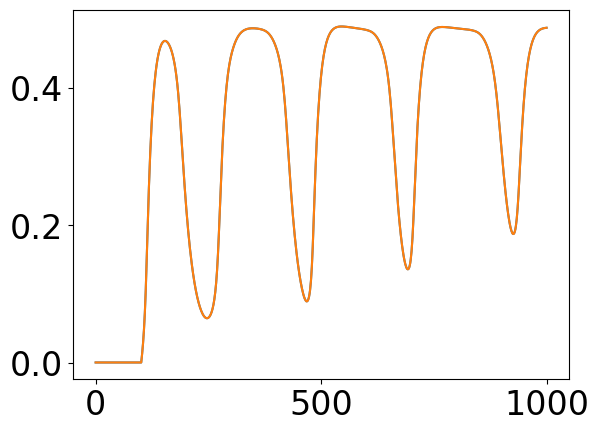

up state with osc decay


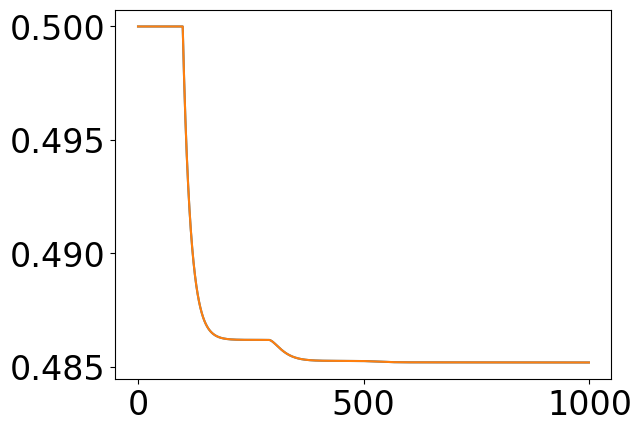

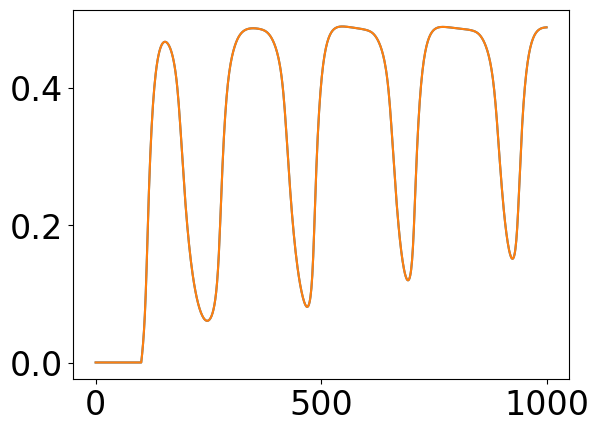

up state with osc decay


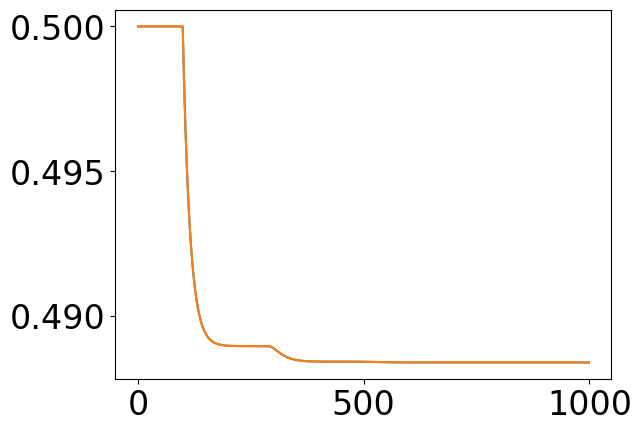

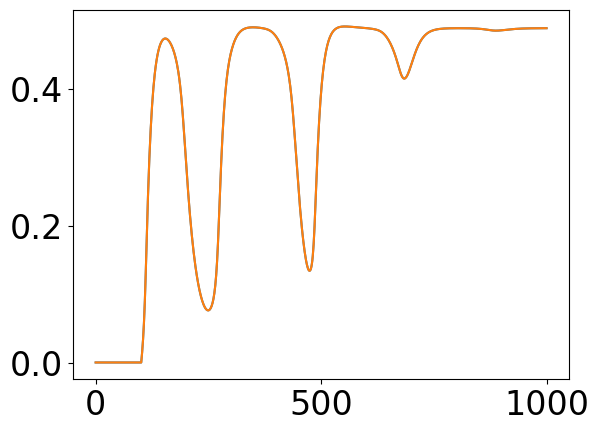

up state with osc decay


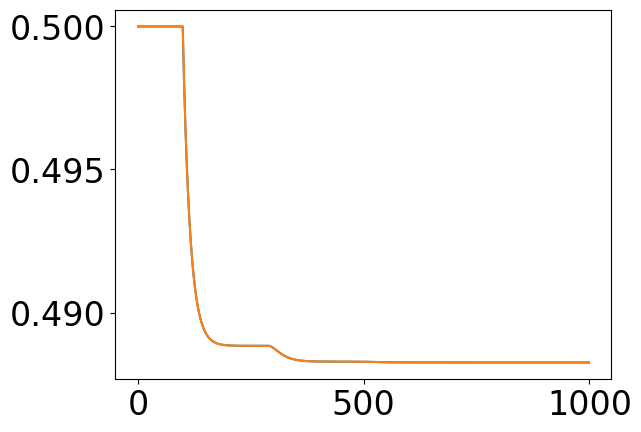

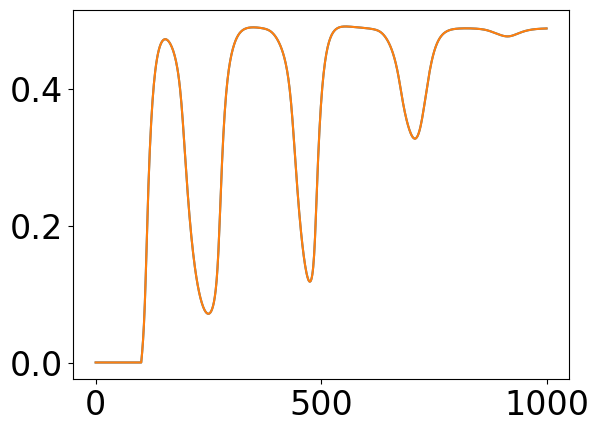

up state with osc decay


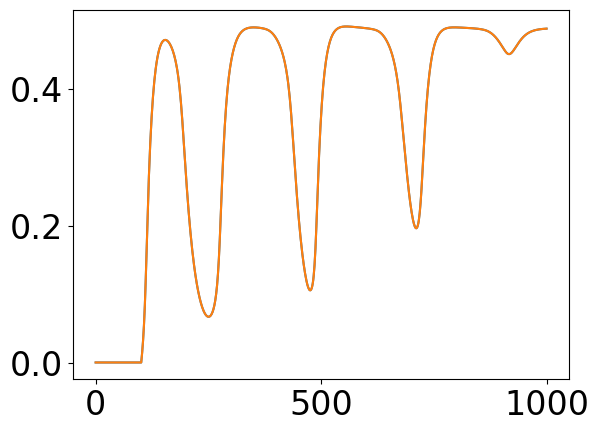

up state with osc decay


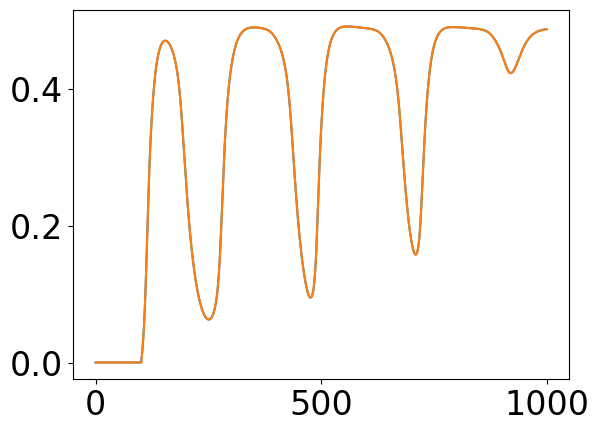

up state with osc decay


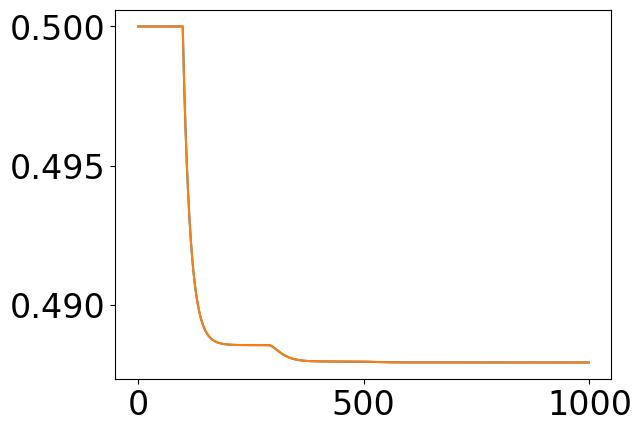

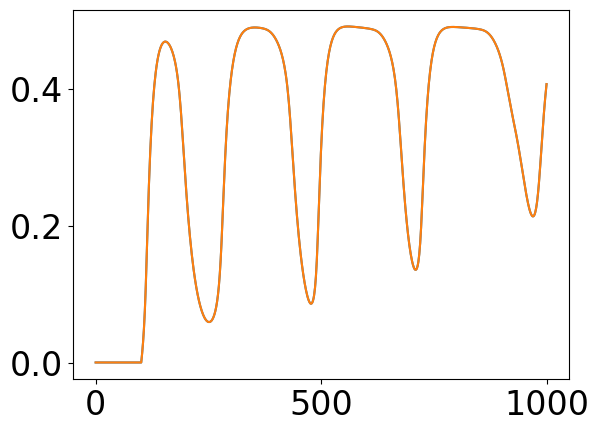

up state with osc decay


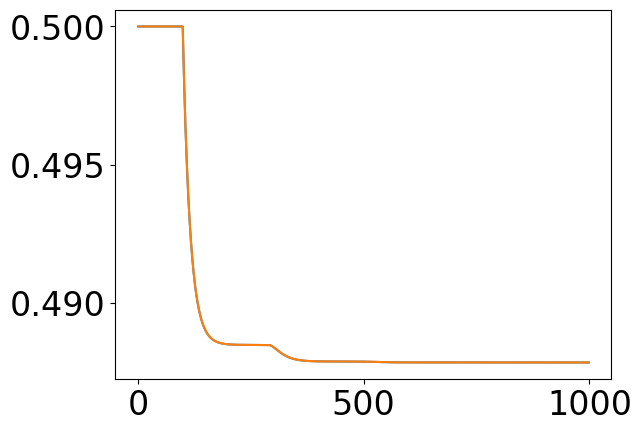

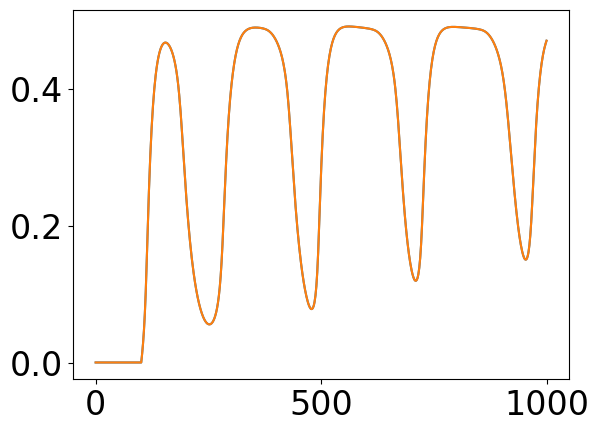

up state with osc decay


up state with osc decay


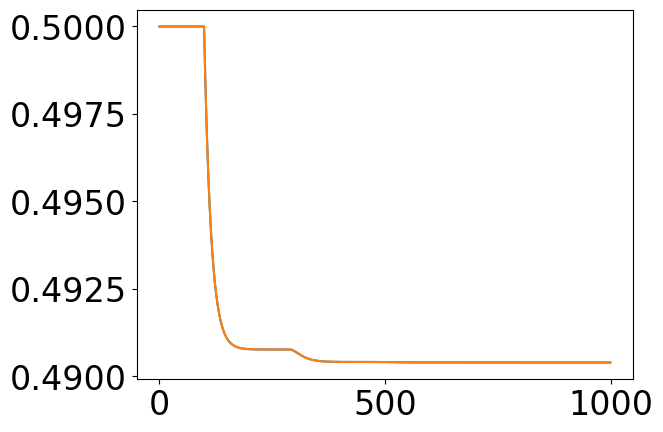

up state with osc decay


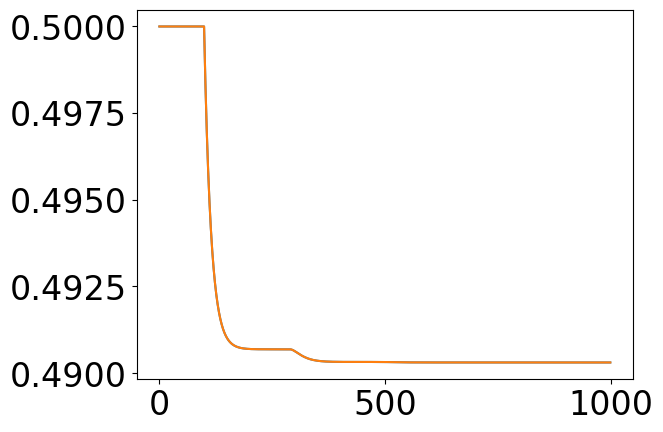

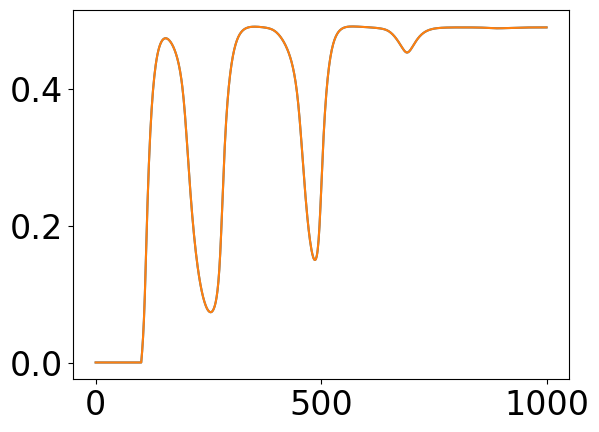

up state with osc decay


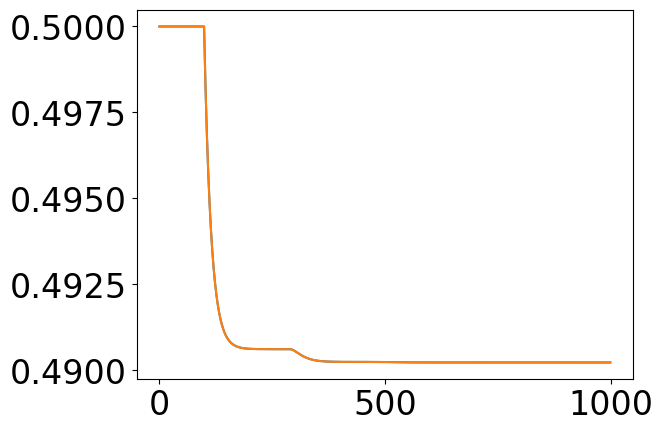

up state with osc decay


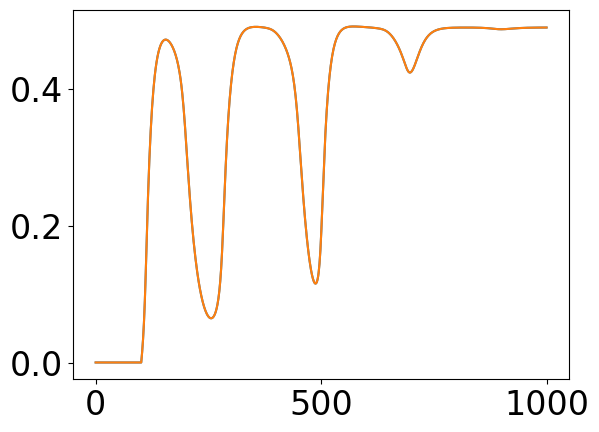

up state with osc decay


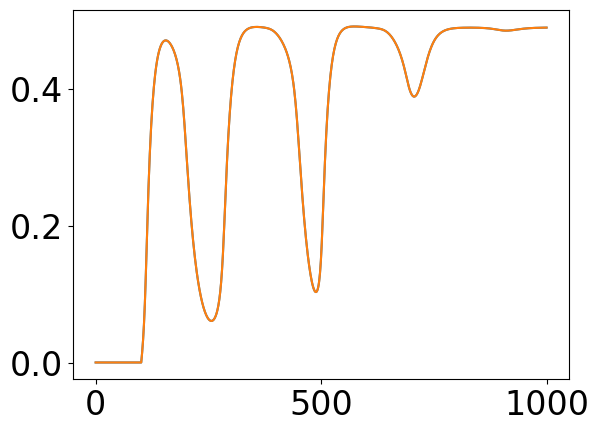

up state with osc decay


up state with osc decay


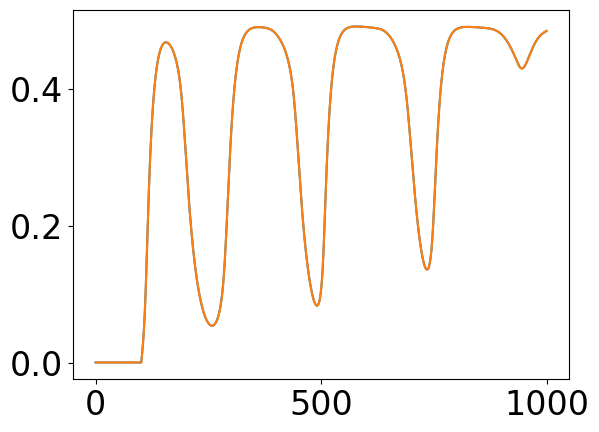

up state with osc decay


up state with osc decay


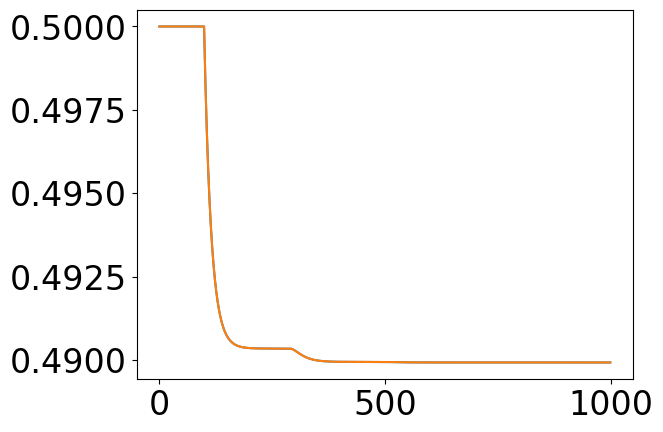

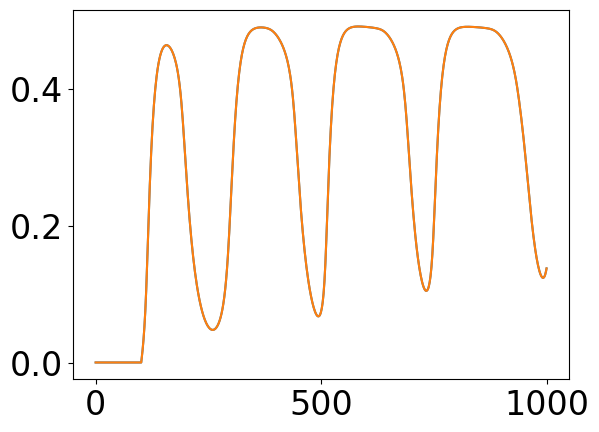

up state with osc decay


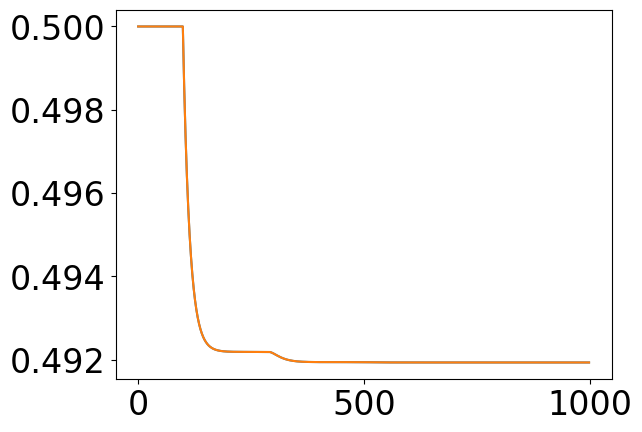

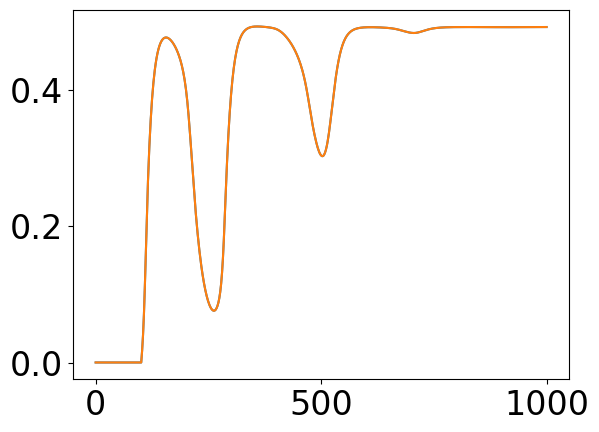

up state with osc decay


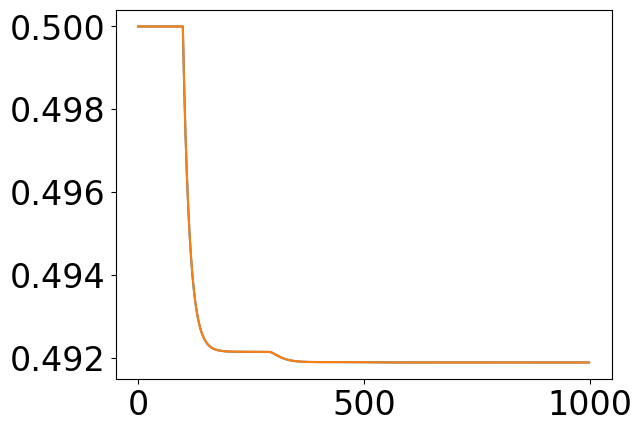

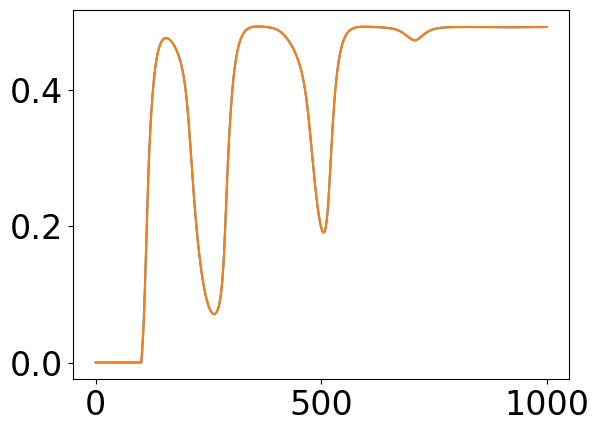

up state with osc decay


up state with osc decay


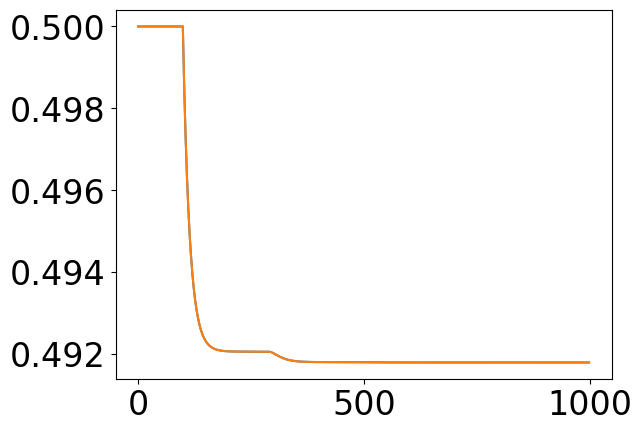

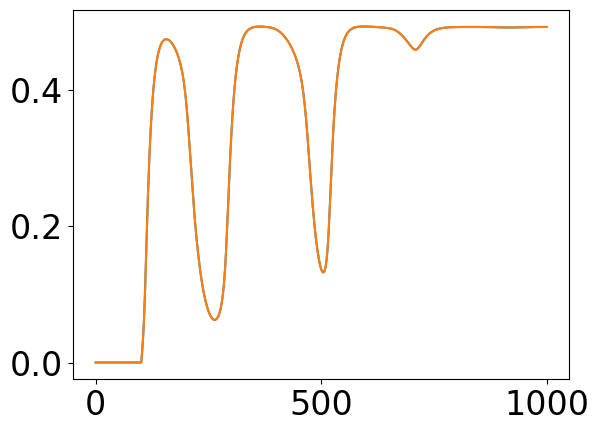

up state with osc decay


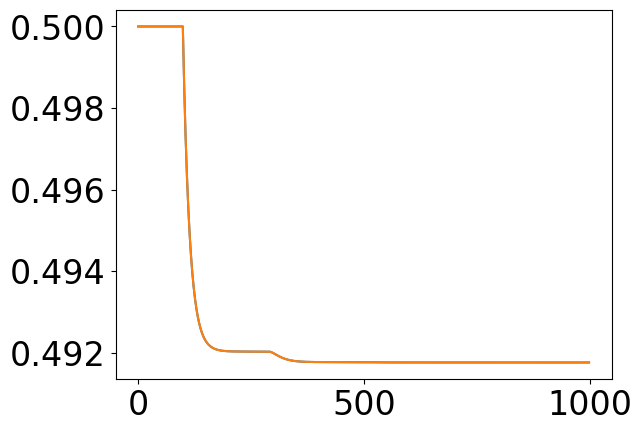

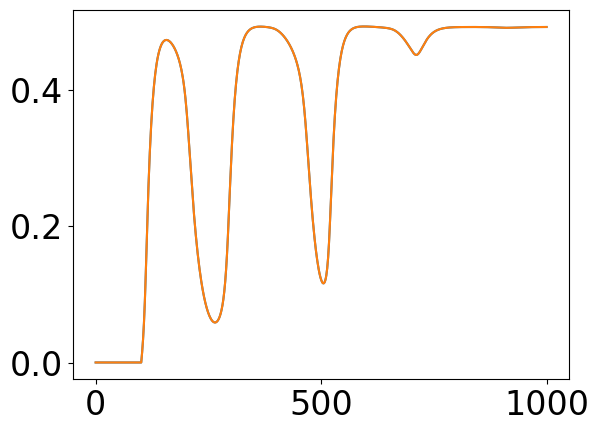

up state with osc decay


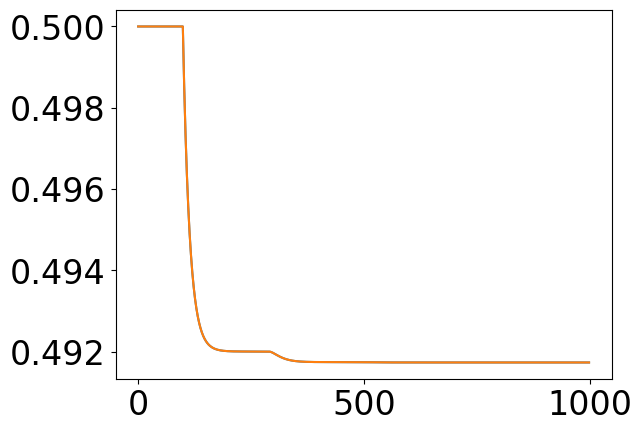

up state with osc decay


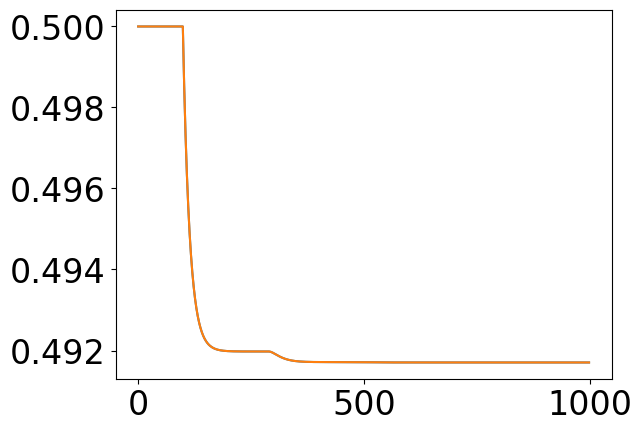

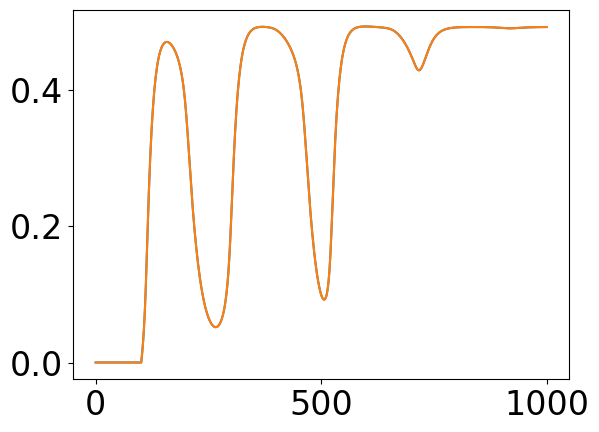

up state with osc decay


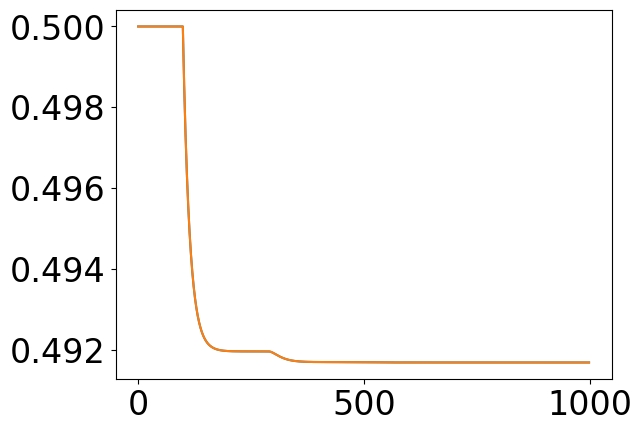

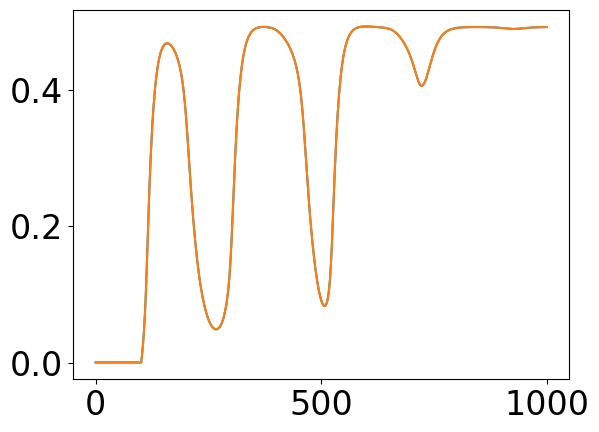

up state with osc decay


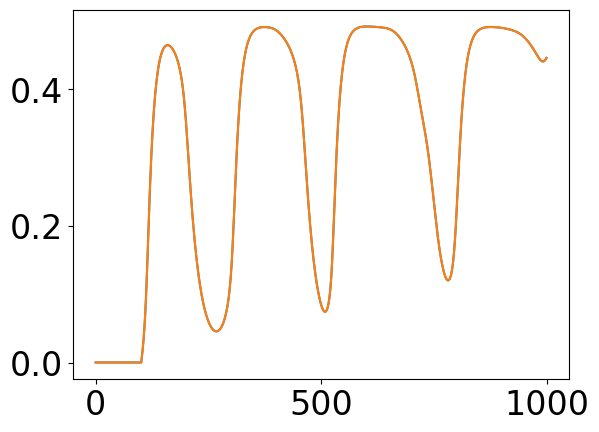

up state with osc decay


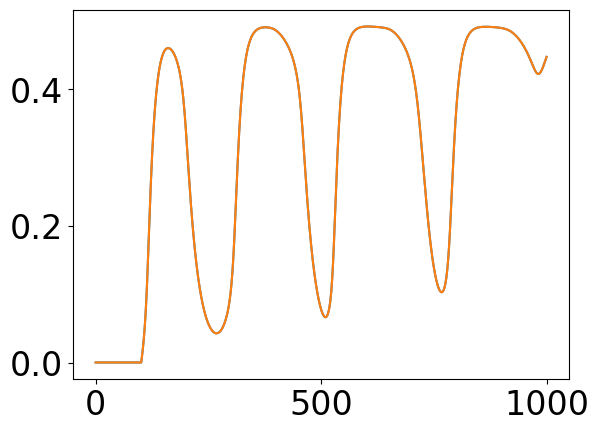

up state with osc decay


up state with osc decay


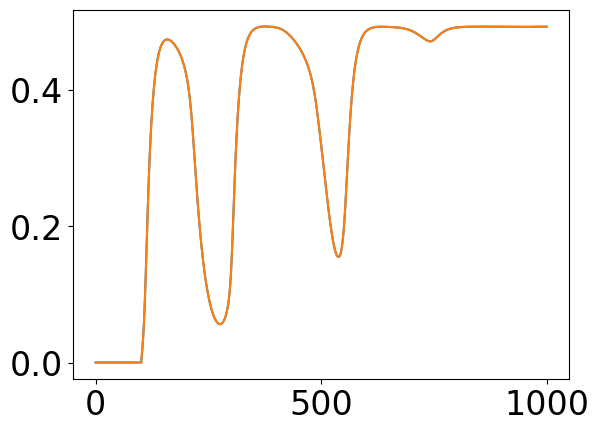

up state with osc decay


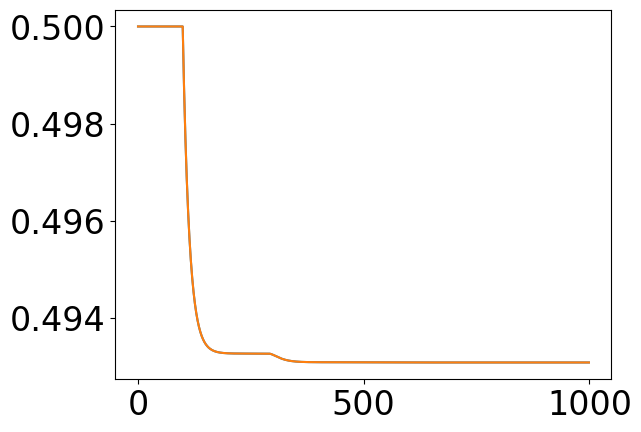

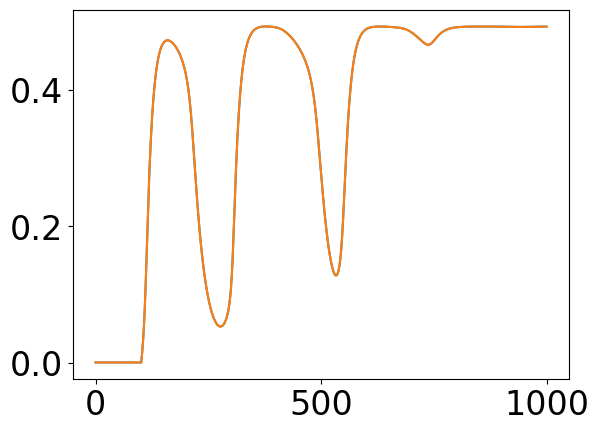

up state with osc decay


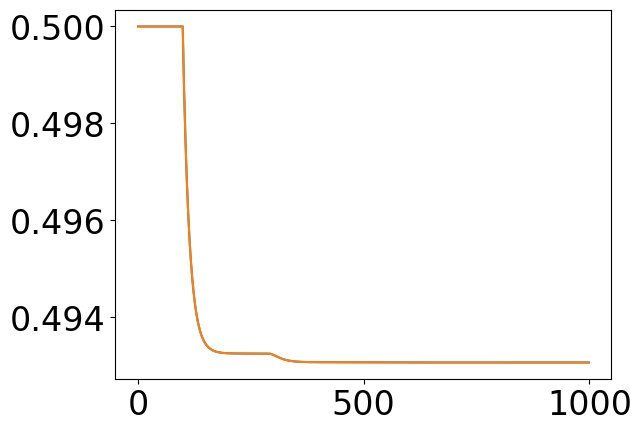

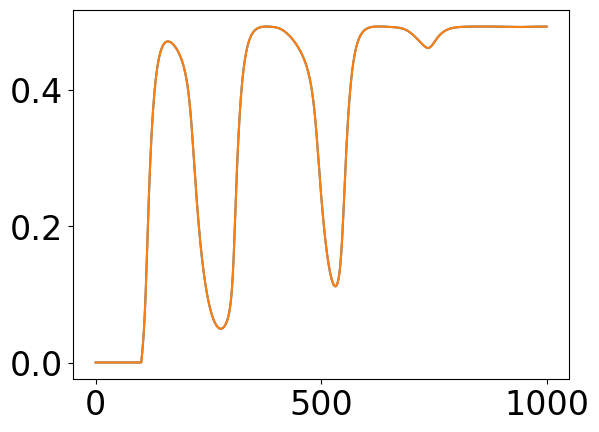

up state with osc decay


up state with osc decay


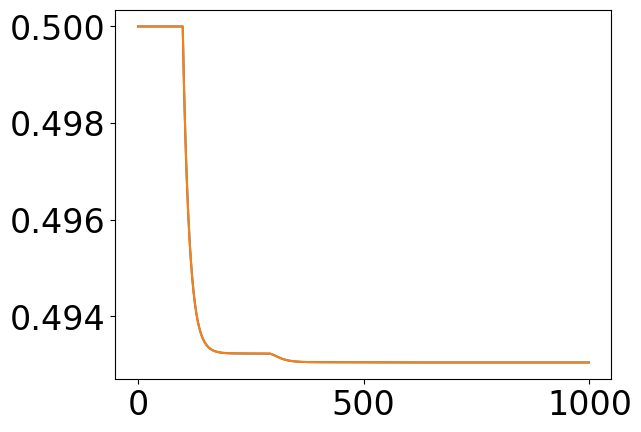

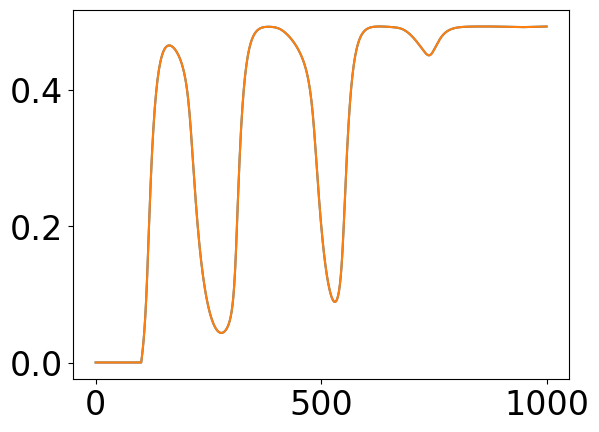

up state with osc decay


up state with osc decay


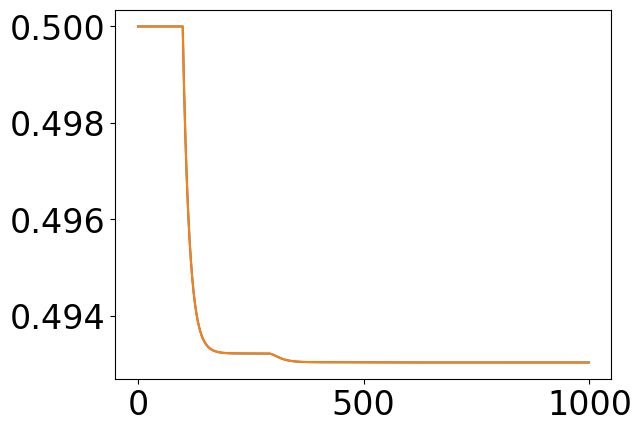

up state with osc decay


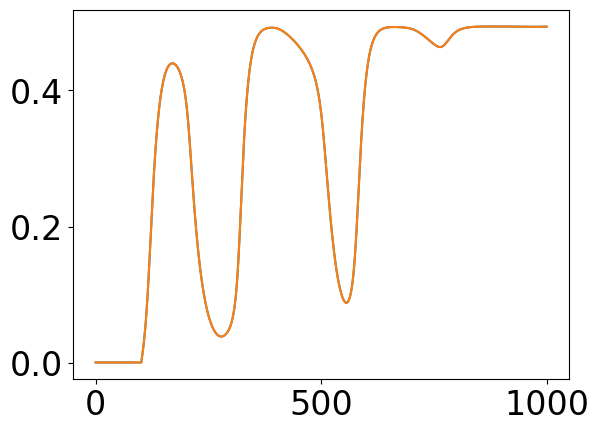

In [17]:
for i in range(len(cmats)):

    if i != 1: continue

    for ci in range(len(coupling_array)):

        for di in range(len(delay_array)):

            print(i, ci, di)

            if ci in [0] and di not in [0]:
                continue

            if ci not in [1,2,3,4,6]: continue

            statespace[i][ci][di]["coords"] = []
            statespace[i][ci][di]["state"] = []
            statespace[i][ci][di]["decay"] = []

            for e_ in eext:
                
                for i_ in iext:

                    dmat = delay_array[di] * cmats[i] * 20.
                
                    model = WCModel(Cmat=cmats[i], Dmat=dmat)
                    model.params.K_gl = coupling_array[ci]
                    dt = 0.1
                    model.params.dt = dt

                    dur = 20.
                    i00, i01 = int(0.5 * dur * 1000/dt - 1000/dt), int(0.5 * dur * 1000/dt) - 1
                    i10, i11 = int(-1000/dt), -1

                    model.params['duration'] = dur * 1000 # Simulation time, ms
                    test_input = ZeroInput().generate_input(duration=model.params['duration']+model.params.dt, dt=model.params.dt)
                    test_input[:,:int(50/dt)] = 5.
                    test_input[:,int(0.5 * dur * 1000/dt)+1:int(0.5 * dur * 1000/dt)+1+int(50/dt)] = -5.
                    model.params.exc_ext = e_ + test_input
                    model.params.inh_ext = i_

                    model.run()

                    state0 = getstate(model.exc[0,i00:i01], (model.exc[1,i00:i01]))
                    state1 = getstate(model.exc[0,i10:i11], (model.exc[1,i10:i11]))

                    state = None

                    if state0[0] == "static" and state1[0] == "static":
                        if np.abs(state0[1][0] - state1[1][0]) < 1e-1 and np.abs(state0[1][1] - state1[1][1]) < 1e-1:
                            state = state0.copy()
                        else:
                            state = ["bistable", [state0[1], state1[1]] ]

                    else:
                        continue

                    decay0e = osc_exp_decay(model.exc[0,int(50/dt):int(50/dt)+1000])
                    decay0i = osc_exp_decay(model.inh[0,int(50/dt):int(50/dt)+1000])
                    decay1e = osc_exp_decay(model.exc[1,int(0.5 * dur * 1000/dt)+1+int(50/dt):int(0.5 * dur * 1000/dt)+1+int(50/dt)+1000])
                    decay1i = osc_exp_decay(model.inh[1,int(0.5 * dur * 1000/dt)+1+int(50/dt):int(0.5 * dur * 1000/dt)+1+int(50/dt)+1000])

                    decay = [decay0e, decay0i, decay1e, decay1i]

                    if state[0] == "static":
                        if "osc" in decay:
                            decay = ["osc", "osc", "osc", "osc"]
                            if state[1][0] > 0.2:
                                print("up state with osc decay")
                                plt.plot(model.exc[0,400:1400])
                                plt.plot(model.exc[1,400:1400])
                                plt.show()

                                plt.plot(model.exc[0,i01+400:i01+1400])
                                plt.plot(model.exc[1,i01+400:i01+1400])
                                plt.show()
                    else:
                        if decay == ["exp", "osc", "exp", "exp"]:
                            decay = ["osc", "osc", "exp", "exp"]
                        elif decay == ["osc", "exp", "exp", "exp"]:
                            decay = ["osc", "osc", "exp", "exp"]
                        elif decay == ["exp", "exp", "osc", "exp"]:
                            decay = ["exp", "exp", "osc", "osc"]
                        elif decay == ["exp", "exp", "exp", "osc"]:
                            decay = ["exp", "exp", "osc", "osc"]
                        
                        if decay == ["osc", "osc", "exp", "exp"]:
                            print("osc around up state in bistable configuration")
                            #plt.plot(model.exc[0,400:1400])
                            #plt.plot(model.exc[1,400:1400])
                            #plt.show()

                            #plt.plot(model.exc[0,i01+400:i01+1400])
                            #plt.plot(model.exc[1,i01+400:i01+1400])
                            #plt.show()

                    statespace[i][ci][di]["coords"].append([e_, i_])
                    statespace[i][ci][di]["state"].append(state)
                    statespace[i][ci][di]["decay"].append(decay)

            #plot_statespace(statespace[i][ci][di], title=None, filename=None, legend=False)

In [10]:
roundind = 2
cmap = plt.cm.get_cmap("viridis")

ms = dx * 1e2 * 2.3

def plot_statespace(statespacedict, title=None, filename=None, legend=False):
    fig, ax = plt.subplots(figsize=(15,12))

    for coord_i in range(len(statespacedict["coords"])):
        alph=0.5
        runsim = False
        if statespacedict["state"][coord_i][0] == "static":
            col = cmap(statespacedict["state"][coord_i][1][0]*2)
        elif statespacedict["state"][coord_i][0] == "bistable":
            col = "red"
        if "osc" in statespacedict["decay"][coord_i]:
                alph=1

        ax.plot(statespacedict["coords"][coord_i][0], statespacedict["coords"][coord_i][1], marker="s", markersize=ms, color=col, alpha=alph)     


        if statespacedict["state"][coord_i][0] == "static":
            if statespacedict["state"][coord_i][1][0] > 0.2 and alph==1:
                print("osc decay for up state at ", statespacedict["coords"][coord_i])

    ax.set_xlim(emin-0.5*dx, emax+0.5*dx)
    ax.set_ylim(imin-0.5*dx, imax+0.5*dx)
    ax.set_xlabel(r"$E^{ext}$")
    ax.set_ylabel(r"$I^{ext}$")

    if title is not None:
        ax.set_title(title)

    if legend:
        custom_leg = [  
                        mpl.lines.Line2D([0], [0], marker='s', color="red", linewidth=0, label='Bistable up/ down',
                            markersize=20),
                         ]
        ax.legend(handles=custom_leg, bbox_to_anchor=(1.05, 1), loc='upper left', labelspacing = 0.3)

    if filename is not None:
        plt.savefig(filename)

    plt.show()

1 0 0


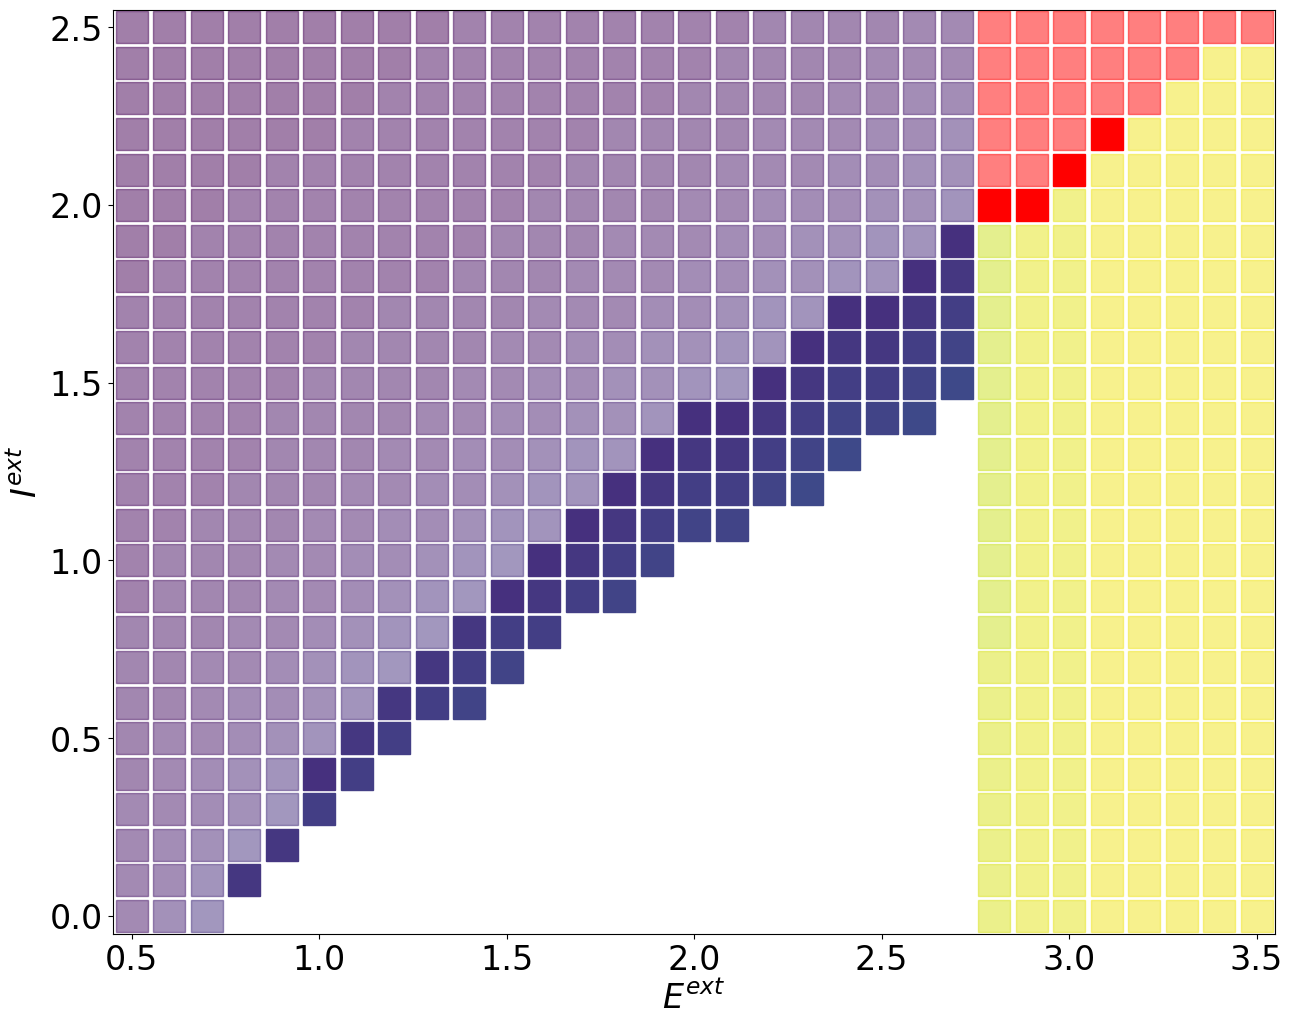

1 5 0


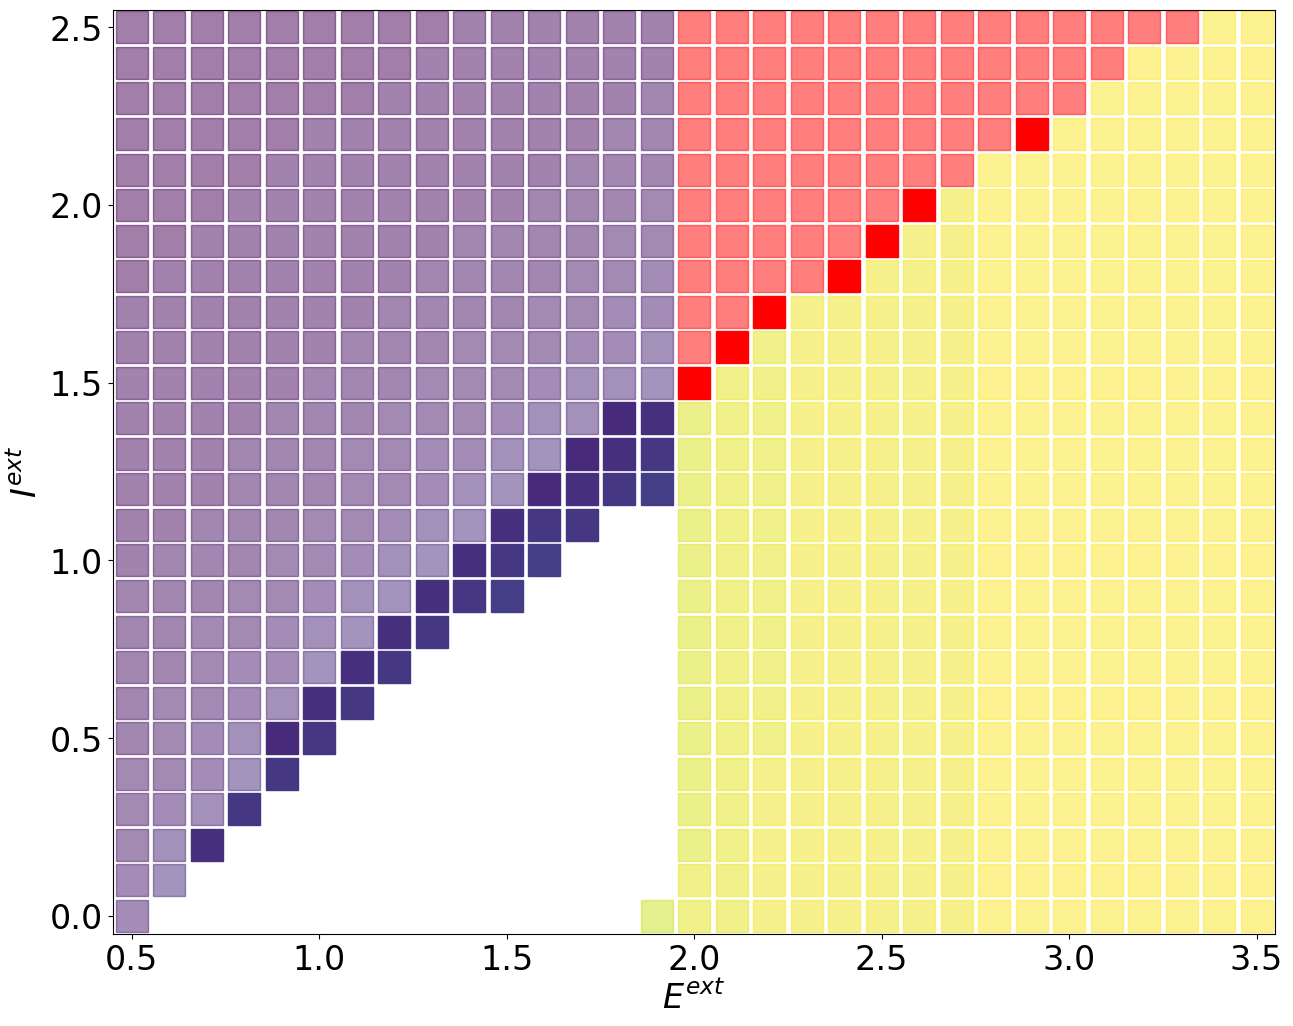

1 5 1


1 5 2
osc decay for up state at  [2.0999999999999996, 0.2]
osc decay for up state at  [2.4999999999999996, 1.6]


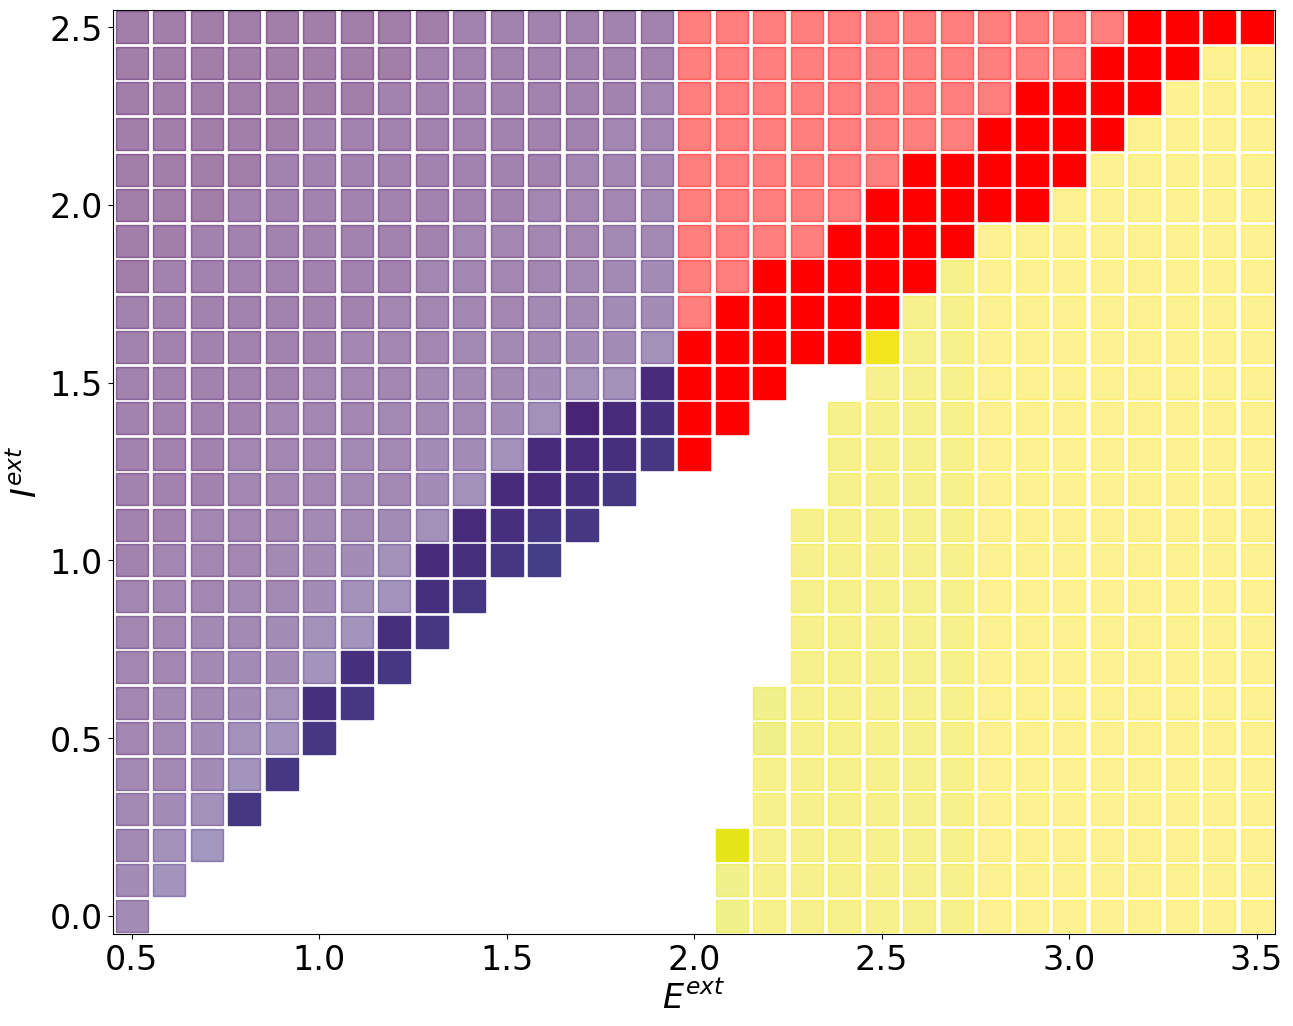

1 5 3
osc decay for up state at  [2.0999999999999996, 0.0]
osc decay for up state at  [2.0999999999999996, 0.1]
osc decay for up state at  [2.1999999999999997, 0.0]
osc decay for up state at  [2.1999999999999997, 0.1]
osc decay for up state at  [2.1999999999999997, 0.2]
osc decay for up state at  [2.1999999999999997, 0.30000000000000004]
osc decay for up state at  [2.1999999999999997, 0.4]
osc decay for up state at  [2.1999999999999997, 0.5]
osc decay for up state at  [2.3, 0.2]
osc decay for up state at  [2.3, 0.30000000000000004]
osc decay for up state at  [2.3, 0.4]
osc decay for up state at  [2.3, 0.5]
osc decay for up state at  [2.3, 0.6000000000000001]
osc decay for up state at  [2.3, 0.7000000000000001]
osc decay for up state at  [2.3, 0.8]
osc decay for up state at  [2.3, 0.9]
osc decay for up state at  [2.3999999999999995, 1.2000000000000002]
osc decay for up state at  [2.3999999999999995, 1.3]
osc decay for up state at  [2.3999999999999995, 1.4000000000000001]


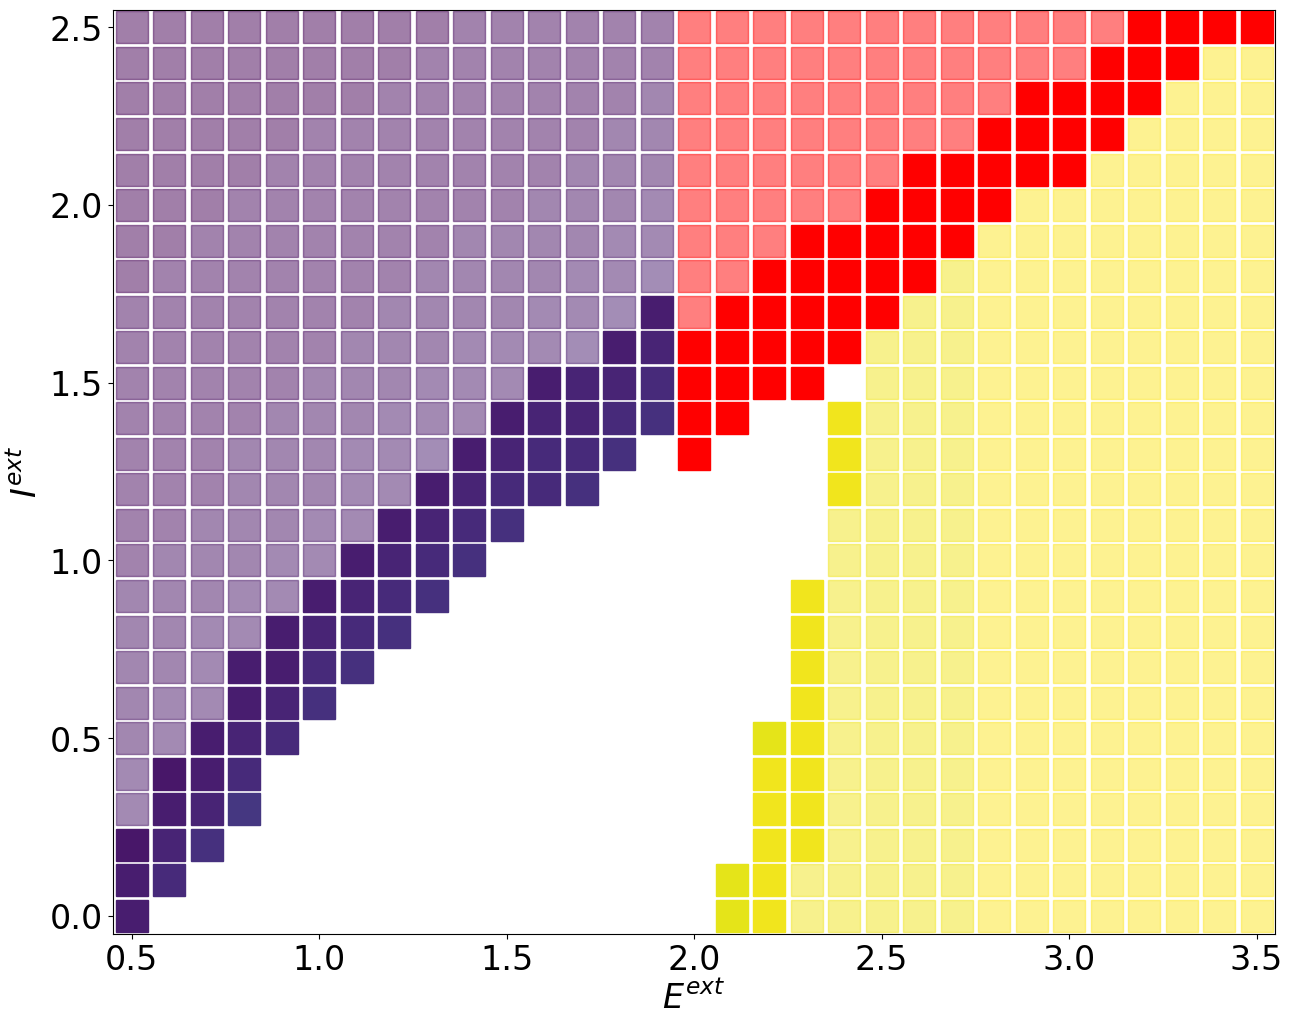

1 5 4
osc decay for up state at  [2.0999999999999996, 0.0]
osc decay for up state at  [2.0999999999999996, 0.1]
osc decay for up state at  [2.1999999999999997, 0.0]
osc decay for up state at  [2.1999999999999997, 0.1]
osc decay for up state at  [2.1999999999999997, 0.2]
osc decay for up state at  [2.1999999999999997, 0.30000000000000004]
osc decay for up state at  [2.1999999999999997, 0.4]
osc decay for up state at  [2.3, 0.0]
osc decay for up state at  [2.3, 0.1]
osc decay for up state at  [2.3, 0.2]
osc decay for up state at  [2.3, 0.30000000000000004]
osc decay for up state at  [2.3, 0.4]
osc decay for up state at  [2.3, 0.5]
osc decay for up state at  [2.3, 0.6000000000000001]
osc decay for up state at  [2.3, 0.7000000000000001]
osc decay for up state at  [2.3, 0.8]
osc decay for up state at  [2.3999999999999995, 0.4]
osc decay for up state at  [2.3999999999999995, 0.5]
osc decay for up state at  [2.3999999999999995, 0.6000000000000001]
osc decay for up state at  [2.399999999999999

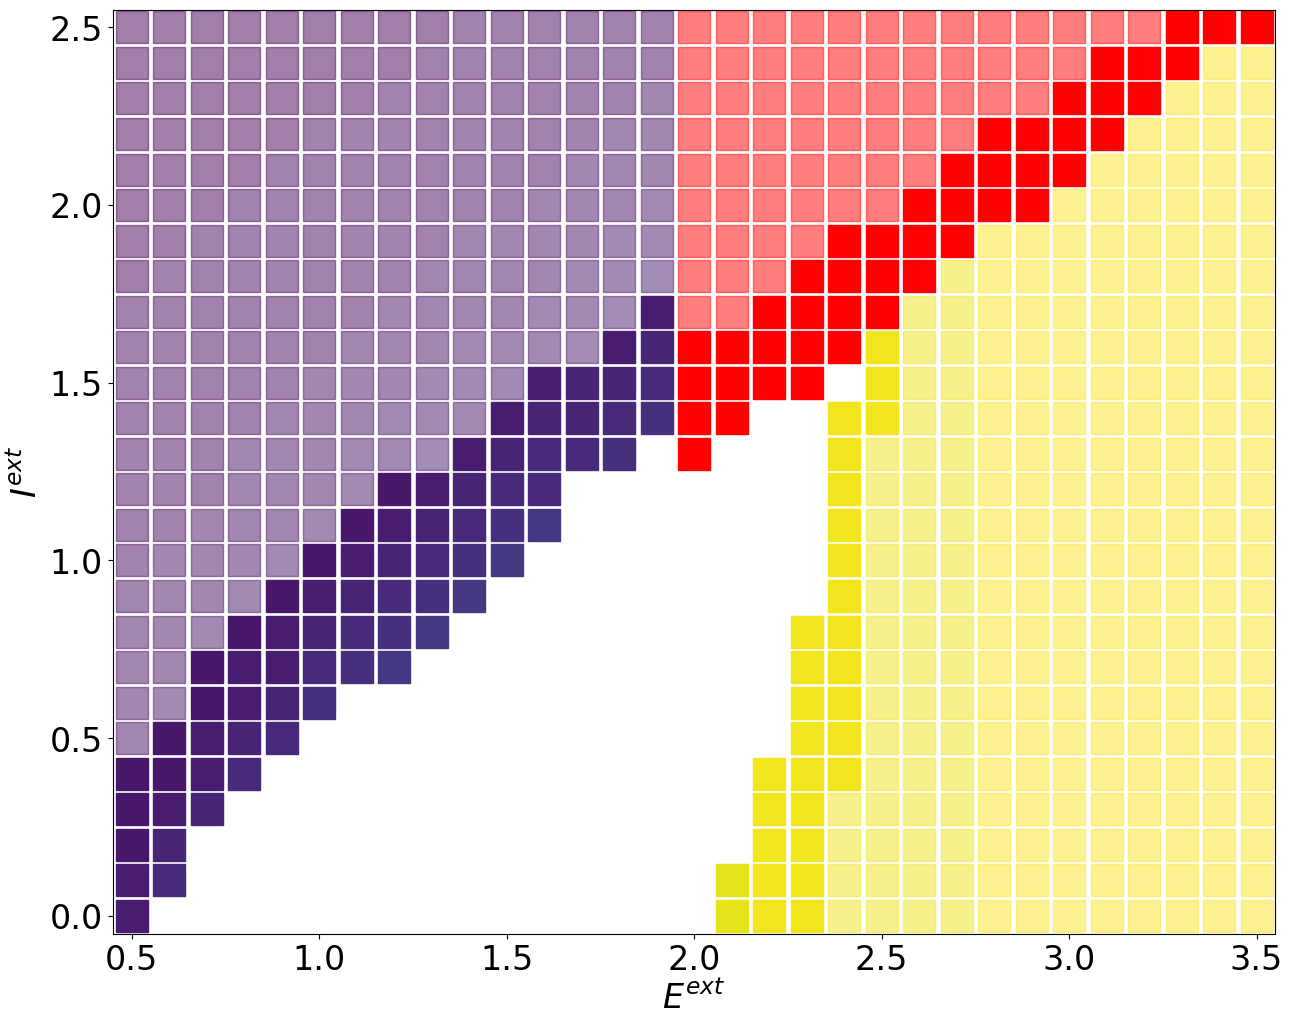

In [13]:
for i in range(len(cmats)):

    if i != 1: continue

    for ci in range(len(coupling_array)):

        for di in range(len(delay_array)):

            if ci in [0] and di not in [0]:
                continue

            if ci not in [0,5]: continue

            print(i, ci, di)


            plot_statespace(statespace[i][ci][di], title=None, filename=None, legend=False)

In [14]:
roundind = 2

def getstate(exc0, exc1):
    ### possible outcomes:
    # ["static", [mean0, mean1]]
    # ["osc", [period, phase]]
    # ["beating", [period0, period1]]
    # ["osc/ static", [mean0, period1]]
    # ["static/ osc", [period0, mean1]]
    PROM = 0.01
    state = [None, None]

    peaks0 = scipy.signal.find_peaks(exc0, prominence=PROM)[0]
    peaks1= scipy.signal.find_peaks(exc1, prominence=PROM)[0]

    if False and len(peaks0) > 4:
        fig, ax = plt.subplots(2,1, figsize=(15,10))
        ax[0].plot(exc0[:2000])
        ax[0].vlines(peaks0, 0, 0.5, color="grey")
        ax[1].plot(exc1[:2000])
        ax[1].vlines(peaks1, 0, 0.5, color="grey")
        ax[0].set_xlim(0, 2000)
        ax[1].set_xlim(0, 2000)
        plt.show()

    if len(peaks0) == 0 and len(peaks1) == 0:
        state[0] = "static"
        state[1] = [np.around(np.mean(exc0),roundind), np.around(np.mean(exc1),roundind) ]
    elif len(peaks0) > 3 and len(peaks1) > 3:
        period0 = getperiods(peaks0)
        period1 = getperiods(peaks1)
        phase = getphase(peaks0, peaks1)
        if np.abs(period0 - period1) < 1e-1: 
            state[0] = "osc"
            state[1] = [period0, phase]
        else:
            state[0] = "beating"
            state[1] = [period0, period1]
            #print("osc at different freq ", state[1])
    elif len(peaks0) > 3:
        state[0] = "osc/ static"
        period0 = getperiods(peaks0)
        state[1] = [period0, np.around(np.mean(exc1),roundind)]
    elif len(peaks1) > 3:
        state[0] = "static/ osc"
        period1 = getperiods(peaks1)
        state[1] = [np.around(np.mean(exc0),roundind), period1]
    else:
        print("WARNING ", peaks0, peaks1)

    return state 

def osc_exp_decay(state):
    PROM = 0.005
    peaks = scipy.signal.find_peaks(state, prominence=PROM)[0]
    if len(peaks) < 3:
        return "exp"
    else:
        return "osc"


def getperiods(peaks):
    pl = []
    for p in range(3, len(peaks)-3):
        pl.append( (peaks[p] - peaks[p-1]) * model.params.dt )
    return np.around(np.mean(pl),roundind)

def getphase(p0, p1):
    phdiff = []
    #print(p0[:12])
    #print(p1[:12])
    for refpeak in p0[2:-2]:
        for i in range(len(p1)):
            if p1[i] > refpeak:
                indit = i-1
                break
        
        phdiff.append( (refpeak - p1[indit]) * model.params.dt)
    #print(phdiff[::3])
    return np.around(np.mean(phdiff),roundind), np.around(np.var(phdiff), roundind)